In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
project_path = '/content/drive/MyDrive/Labelled_Multiclass_Dataset'
os.chdir(project_path)

In [ ]:
!ls

aggregated_data.csv			    googleNestMini_Multi.csv  pca.pkl
amazonAlexa_Multi.csv			    GosungLight2_Multi.csv    phillipsHub_Multi.csv
binary_models				    kasaSmartPlug_Multi.csv   rf_model.pkl
combined_data_updated.csv		    longPlus-Cam_Multi.csv    RingDoorbell_Multi.csv
combined_data_with_okpVacc_modified.csv     multi_class_models	      roborockVacc_Multi.csv
combined_data_without_okpVacc.csv	    nestCam_Multi.csv	      scaler.pkl
combined_data_without_okpVacc_modified.csv  okpVacc_Multi.csv


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Labelled_Multiclass_Dataset/combined_data_with_okpVacc_modified.csv')

In [ ]:
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
drop_columns = [
    "id"
   ]
data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125909 entries, 0 to 125908
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   device_id          125909 non-null  int64  
 1   session_id         125909 non-null  object 
 2   src_ip             125909 non-null  object 
 3   dst_ip             125909 non-null  object 
 4   src_port           125909 non-null  int64  
 5   dst_port           125909 non-null  int64  
 6   protocol           125909 non-null  int64  
 7   timestamp          125909 non-null  object 
 8   flow_duration      125909 non-null  int64  
 9   flow_byts_s        125909 non-null  float64
 10  flow_pkts_s        125909 non-null  float64
 11  fwd_pkts_s         125909 non-null  float64
 12  bwd_pkts_s         125909 non-null  float64
 13  tot_fwd_pkts       125909 non-null  int64  
 14  tot_bwd_pkts       125909 non-null  int64  
 15  totlen_fwd_pkts    125909 non-null  int64  
 16  to

In [ ]:
drop_columns = [
    "device_id", "session_id",
   ]
data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
# Identifying missing values
missing_values = data.isna().sum()
print(missing_values.loc[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Series([], dtype: int64)


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 0
Missing values after processing infinite values: 0


Exploratory Data Analysis

In [ ]:
# Timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'].describe()

<ipython-input-12-14c61a11f7b1>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['timestamp'] = pd.to_datetime(data['timestamp'])


count                           125909
mean     2024-08-16 23:48:20.296086784
min                2024-08-13 08:00:00
25%                2024-08-14 15:40:00
50%                2024-08-15 13:43:00
75%                2024-08-16 10:30:00
max                2024-08-26 20:16:00
Name: timestamp, dtype: object

In [ ]:
date = data['timestamp'].groupby([data['Label'],data['timestamp'].dt.date]).agg({'count'})
date = date.reset_index()
date

Label   timestamp  count
0       Benign  2024-08-13  13402
1       Benign  2024-08-14  20477
2       Benign  2024-08-15  26275
3       Benign  2024-08-16  36609
4       Benign  2024-08-26  17832
5   HTTPAttack  2024-08-13    400
6   HTTPAttack  2024-08-14    600
7   HTTPAttack  2024-08-15    400
8   HTTPAttack  2024-08-16    400
9   HTTPAttack  2024-08-26    203
10   TCPAttack  2024-08-13    600
11   TCPAttack  2024-08-14    900
12   TCPAttack  2024-08-15    600
13   TCPAttack  2024-08-16    600
14   TCPAttack  2024-08-26    300
15   UDPAttack  2024-08-13    601
16   UDPAttack  2024-08-14    900
17   UDPAttack  2024-08-15    600
18   UDPAttack  2024-08-16    600
19   UDPAttack  2024-08-26    303
20  XMasAttack  2024-08-13    628
21  XMasAttack  2024-08-14   1200
22  XMasAttack  2024-08-15    555
23  XMasAttack  2024-08-16    625
24  XMasAttack  2024-08-26    299

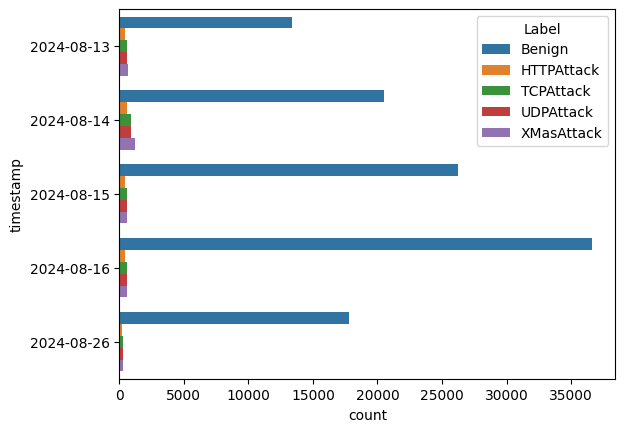

In [ ]:
timeplot = sns.barplot(x='count', y='timestamp', hue='Label', data=date)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [ ]:
# Copy of original dataframe:
data1=data.copy()

'src_ip' count for HTTPAttack:
src_ip
192.168.1.192    2003
Name: count, dtype: int64 

'src_ip' count for TCPAttack:
src_ip
192.168.1.192    3000
Name: count, dtype: int64 

'src_ip' count for UDPAttack:
src_ip
192.168.1.192    3004
Name: count, dtype: int64 

'src_ip' count for XMasAttack:
src_ip
192.168.1.192    3307
Name: count, dtype: int64 

'src_ip' count for Benign:
src_ip
192.168.1.170    53046
192.168.1.243    47760
192.168.1.102     4817
192.168.1.192     2694
192.168.1.215     2409
192.168.1.172     1480
192.168.1.200     1249
192.168.1.103      430
131.100.0.205      351
192.168.1.129      113
Name: count, dtype: int64 



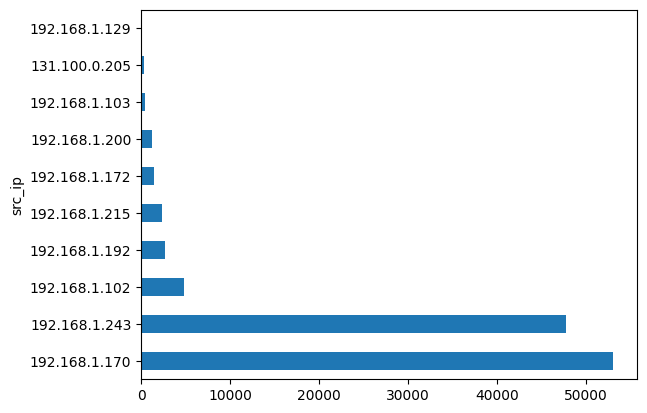


Source IP unique count
33


In [ ]:
# EDA on Source, Destination IP

col = 'src_ip'
kind='barh'
HTTPAttack = data1[data1['Label']=='HTTPAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for HTTPAttack:'+'\033[0m')
print(HTTPAttack,'\n')

TCPAttack = data1[data1['Label']=='TCPAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for TCPAttack:'+'\033[0m')
print(TCPAttack,'\n')

UDPAttack = data1[data1['Label']=='UDPAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for UDPAttack:'+'\033[0m')
print(UDPAttack,'\n')

XMasAttack = data1[data1['Label']=='XMasAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for XMasAttack:'+'\033[0m')
print(XMasAttack,'\n')

benign = data1[data1['Label']=='Benign'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for Benign:'+'\033[0m')
print(benign,'\n')
benign.plot(kind=kind)
plt.show()

print('\nSource IP unique count')
print(len(data1[col].unique()))

'dst_ip' count for HTTPAttack:
dst_ip
192.168.1.200    203
192.168.1.103    200
192.168.1.102    200
192.168.1.215    200
192.168.1.104    200
192.168.1.175    200
192.168.1.196    200
192.168.1.172    200
192.168.1.221    200
192.168.1.170    200
Name: count, dtype: int64 

'dst_ip' count for TCPAttack:
dst_ip
192.168.1.103    300
192.168.1.102    300
192.168.1.215    300
192.168.1.104    300
192.168.1.175    300
192.168.1.196    300
192.168.1.172    300
192.168.1.221    300
192.168.1.170    300
192.168.1.200    300
Name: count, dtype: int64 

'dst_ip' count for UDPAttack:
dst_ip
192.168.1.200    303
192.168.1.103    300
192.168.1.102    300
192.168.1.215    300
192.168.1.104    300
192.168.1.175    300
192.168.1.196    300
192.168.1.172    300
192.168.1.221    300
192.168.1.170    300
Name: count, dtype: int64 

'dst_ip' count for XMasAttack:
dst_ip
192.168.1.103    600
192.168.1.215    499
192.168.1.104    328
192.168.1.196    326
192.168.1.172    302
192.168.1.102    300
192.168.1.

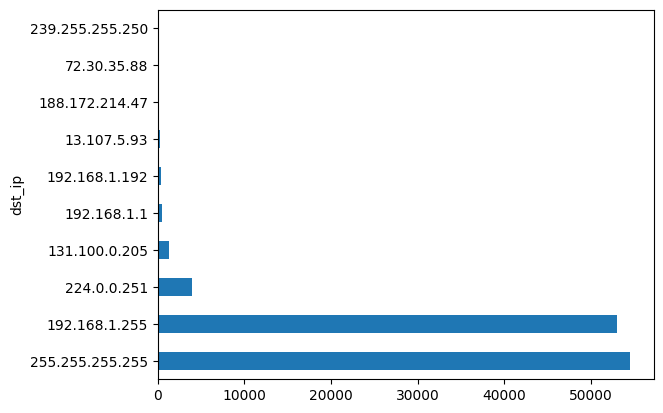


Destination IP unique count
117


In [ ]:
col = 'dst_ip'
kind='barh'
HTTPAttack = data1[data1['Label']=='HTTPAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for HTTPAttack:'+'\033[0m')
print(HTTPAttack,'\n')

TCPAttack = data1[data1['Label']=='TCPAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for TCPAttack:'+'\033[0m')
print(TCPAttack,'\n')

UDPAttack = data1[data1['Label']=='UDPAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for UDPAttack:'+'\033[0m')
print(UDPAttack,'\n')

XMasAttack = data1[data1['Label']=='XMasAttack'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for XMasAttack:'+'\033[0m')
print(XMasAttack,'\n')

benign = data1[data1['Label']=='Benign'][col].value_counts().nlargest(10)
print('\033[1m'+'\'' +col+'\''+' count for Benign:'+'\033[0m')
print(benign,'\n')
benign.plot(kind=kind)
plt.show()

print('\nDestination IP unique count')
print(len(data1[col].unique()))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['Attack Number'] = le.fit_transform(data1['Label'])

print(data1['Attack Number'].unique())

[0 4 2 3 1]


In [ ]:
encoded_values = data1['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: Benign
1: HTTPAttack
2: TCPAttack
3: UDPAttack
4: XMasAttack


In [ ]:
def meta_data(col,dat=data1, kind='barh'):

    HTTPAttack = dat[dat['Attack Number']==1][col].value_counts().nlargest(10)
    print('\033[1m'+'\'' +col+'\''+' count for HTTPAttack:'+'\033[0m')
    print(HTTPAttack,'\n')

    TCPAttack = dat[dat['Attack Number']==2][col].value_counts().nlargest(10)
    print('\033[1m'+'\'' +col+'\''+' count for TCPAttack:'+'\033[0m')
    print(TCPAttack,'\n')


    UDPAttack = dat[dat['Attack Number']==3][col].value_counts().nlargest(10)
    print('\033[1m'+'\'' +col+'\''+' count for UDPAttack:'+'\033[0m')
    print(UDPAttack,'\n')


    XMasAttack = dat[dat['Attack Number']==4][col].value_counts().nlargest(10)
    print('\033[1m'+'\'' +col+'\''+' count for XMasAttack:'+'\033[0m')
    print(XMasAttack,'\n')


    Benign = dat[dat['Attack Number']==0][col].value_counts().nlargest(10)
    print('\033[1m'+'\'' +col+'\''+' count for Benign:'+'\033[0m')
    print(Benign,'\n')
    benign.plot(kind=kind)
    plt.show()

    return

'src_port' count for HTTPAttack:
src_port
2242    4
2251    4
2240    4
2241    4
2243    4
2244    4
2245    4
2246    4
2247    4
2248    4
Name: count, dtype: int64 

'src_port' count for TCPAttack:
src_port
2779    5
2781    5
2105    5
2106    5
2792    5
2791    5
2790    5
2789    5
2788    5
2787    5
Name: count, dtype: int64 

'src_port' count for UDPAttack:
src_port
2067    6
1918    6
2068    6
2069    6
2070    6
1926    6
1925    6
1924    6
1923    6
1921    6
Name: count, dtype: int64 

'src_port' count for XMasAttack:
src_port
41750    100
47398    100
39753    100
56975    100
55759    100
52067    100
62774    100
40619    100
53629    100
46118    100
Name: count, dtype: int64 

'src_port' count for Benign:
src_port
5353     3968
49154    2411
9487     1515
9999     1504
50458    1298
52932     533
5683      498
55830     482
5938      385
50435     248
Name: count, dtype: int64 



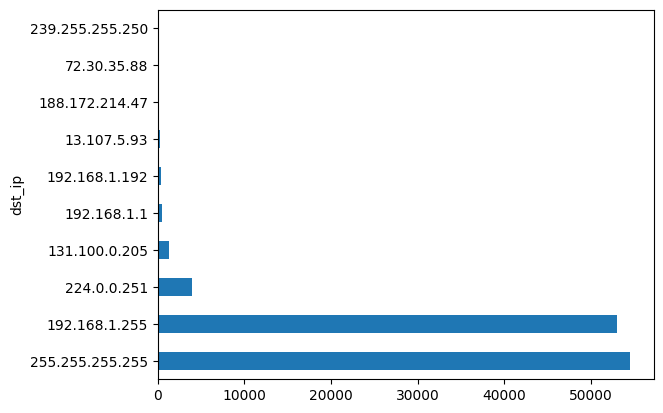

In [ ]:
meta_data('src_port')

'dst_port' count for HTTPAttack:
dst_port
80    2003
Name: count, dtype: int64 

'dst_port' count for TCPAttack:
dst_port
443    3000
Name: count, dtype: int64 

'dst_port' count for UDPAttack:
dst_port
53    3004
Name: count, dtype: int64 

'dst_port' count for XMasAttack:
dst_port
73    37
42    37
8     36
40    36
28    36
4     36
56    36
72    36
9     35
39    35
Name: count, dtype: int64 

'dst_port' count for Benign:
dst_port
58866    53046
34569    47244
5353      3978
6667      3658
9999      1527
9478      1515
5938      1513
5683       498
53         437
443        396
Name: count, dtype: int64 



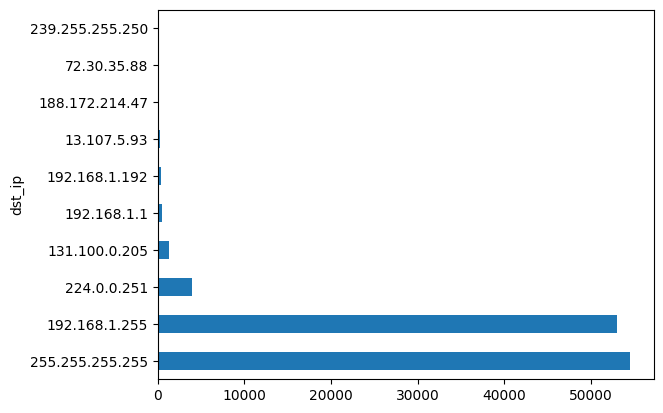

In [ ]:
meta_data('dst_port')

'protocol' count for HTTPAttack:
protocol
6    2003
Name: count, dtype: int64 

'protocol' count for TCPAttack:
protocol
6    3000
Name: count, dtype: int64 

'protocol' count for UDPAttack:
protocol
17    3001
6        3
Name: count, dtype: int64 

'protocol' count for XMasAttack:
protocol
6    3307
Name: count, dtype: int64 

'protocol' count for Benign:
protocol
17    112335
6       2260
Name: count, dtype: int64 



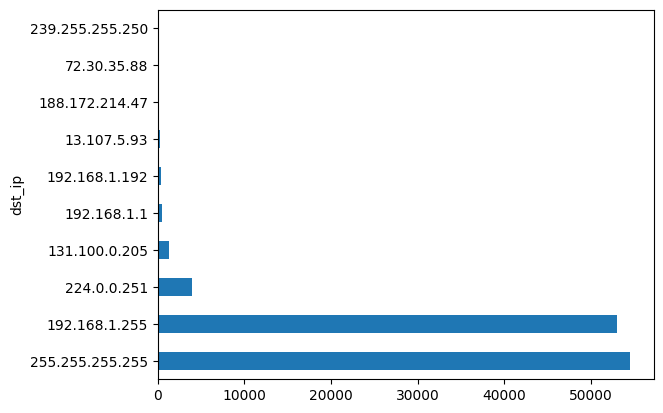

In [ ]:
meta_data('protocol')

EDA on Flow Features

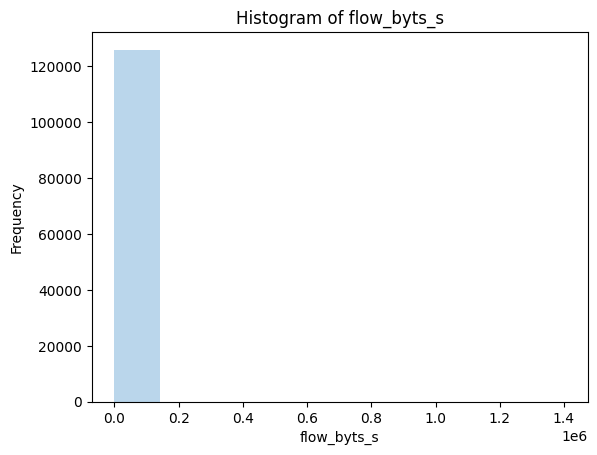

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['flow_byts_s'], color = colors[1])
plt.title('Histogram of flow_byts_s')
plt.xlabel('flow_byts_s')
plt.ylabel('Frequency')
plt.show()

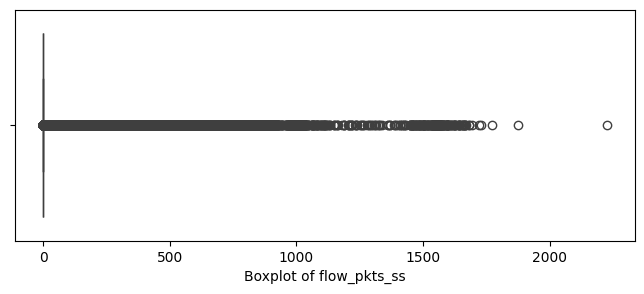

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['flow_pkts_s'])
plt.xlabel('Boxplot of flow_pkts_ss')
plt.show()

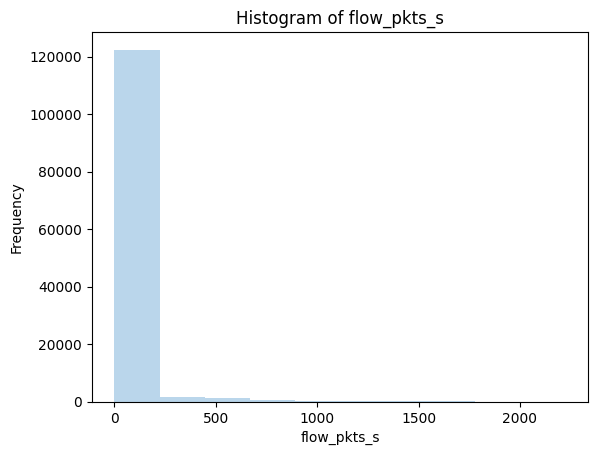

In [ ]:
plt.hist(data['flow_pkts_s'], color = colors[1])
plt.title('Histogram of flow_pkts_s')
plt.xlabel('flow_pkts_s')
plt.ylabel('Frequency')
plt.show()

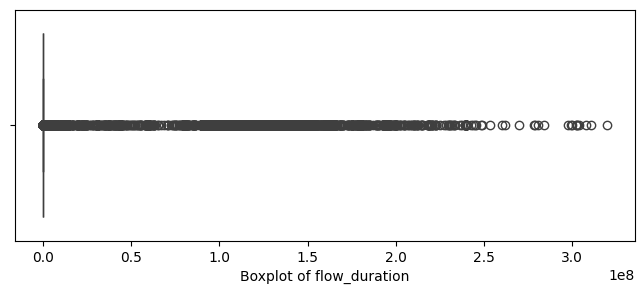

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['flow_duration'])
plt.xlabel('Boxplot of flow_duration')
plt.show()

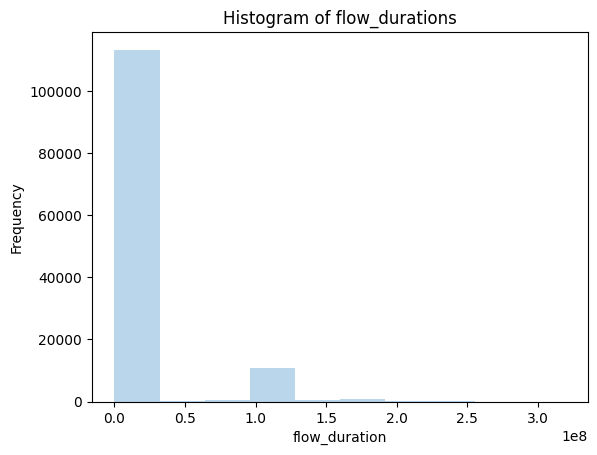

In [ ]:
plt.hist(data['flow_duration'], color = colors[1])
plt.title('Histogram of flow_durations')
plt.xlabel('flow_duration')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print('Number of \'flow_byts_s\' missing values:', data['flow_byts_s'].isna().sum())
print('Number of \'flow_pkts_s\' missing values:', data['flow_pkts_s'].isna().sum())

Number of 'flow_byts_s' missing values: 0
Number of 'flow_pkts_s' missing values: 0


In [ ]:
data['Label'].unique()

array(['Benign', 'XMasAttack', 'TCPAttack', 'UDPAttack', 'HTTPAttack'],
      dtype=object)

In [ ]:
data['Label'].value_counts()

Label
Benign        96763
XMasAttack     3008
UDPAttack      2701
TCPAttack      2700
HTTPAttack     1800
Name: count, dtype: int64

In [ ]:
# Calculate Byte and Packet ratio
epsilon = 1e-9

# Byte Ratio (Forward / Backward)
data['byte_ratio'] = data['totlen_fwd_pkts'] / (data['totlen_bwd_pkts'] + epsilon)

# Packet Ratio (Forward / Backward)
data['pkt_ratio'] = data['tot_fwd_pkts'] / (data['tot_bwd_pkts'] + epsilon)

In [ ]:
# Calculate Flow directional ratio
# Directional Packet Ratio
data['directional_pkt_ratio'] = data['tot_fwd_pkts'] / (data['tot_fwd_pkts'] + data['tot_bwd_pkts'] + epsilon)

# Directional Byte Ratio
data['directional_byte_ratio'] = data['totlen_fwd_pkts'] / (data['totlen_fwd_pkts'] + data['totlen_bwd_pkts'] + epsilon)

In [ ]:
# Creating a new column BinLabel
data['BinLabel'] = data['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

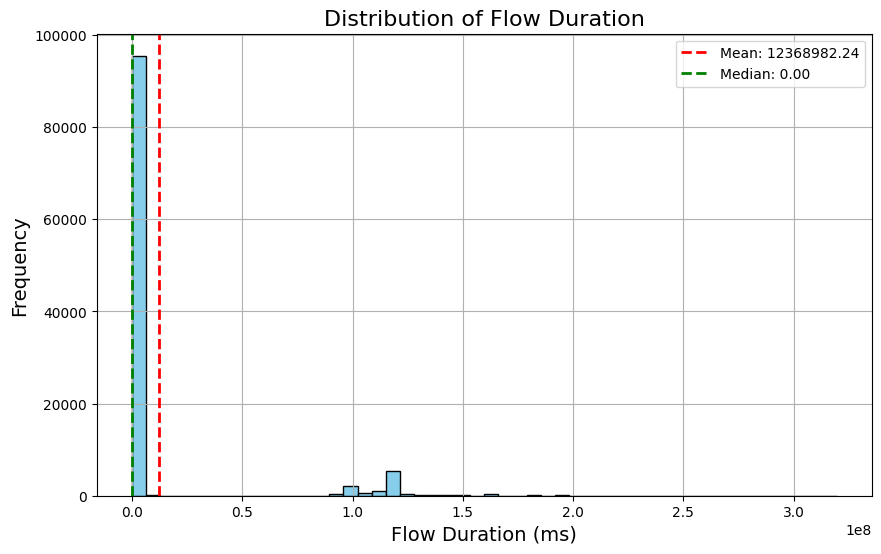

In [ ]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(10, 6))
data['flow_duration'].hist(bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Flow Duration (ms)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Flow Duration', fontsize=16)
mean_duration = data['flow_duration'].mean()
median_duration = data['flow_duration'].median()
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_duration:.2f}')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_duration:.2f}')
plt.legend()
plt.show()

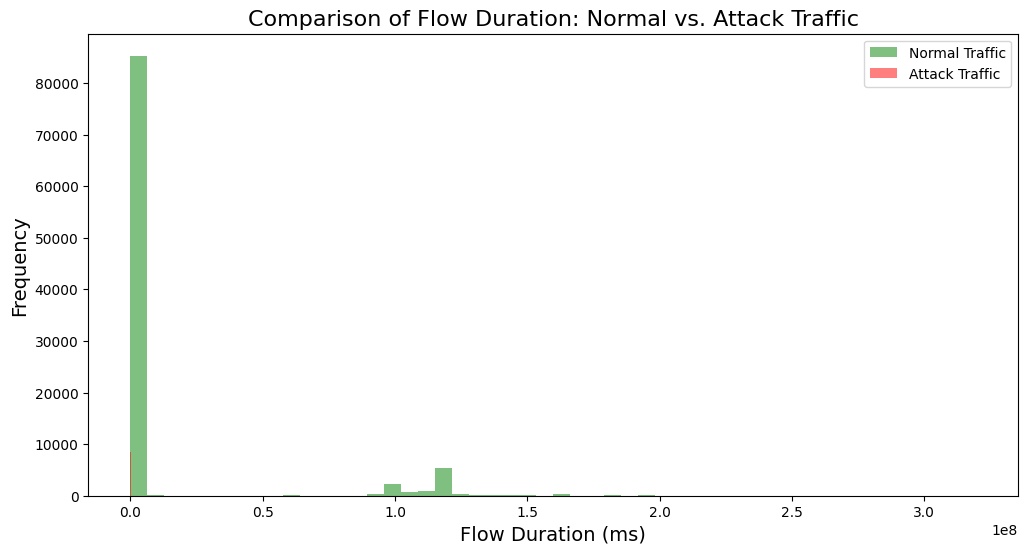

In [ ]:
import matplotlib.pyplot as plt
normal_traffic = data[data['BinLabel'] == 0]
attack_traffic = data[data['BinLabel'] != 0]
plt.figure(figsize=(12, 6))
plt.hist(normal_traffic['flow_duration'], bins=50, alpha=0.5, label='Normal Traffic', color='green')
plt.hist(attack_traffic['flow_duration'], bins=50, alpha=0.5, label='Attack Traffic', color='red')
plt.xlabel('Flow Duration (ms)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Comparison of Flow Duration: Normal vs. Attack Traffic', fontsize=16)
plt.legend()
plt.show()

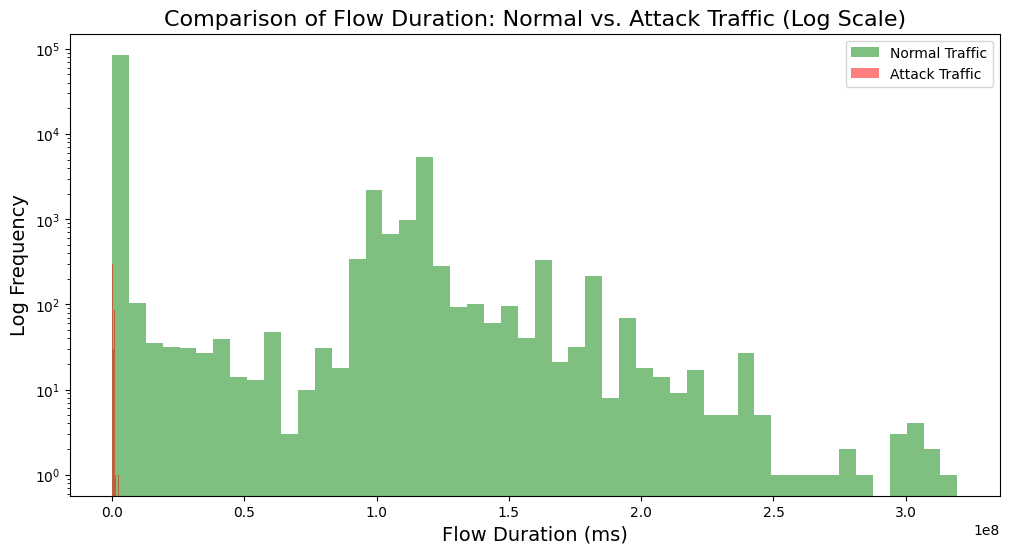

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(normal_traffic['flow_duration'], bins=50, alpha=0.5, label='Normal Traffic', color='green')
plt.hist(attack_traffic['flow_duration'], bins=50, alpha=0.5, label='Attack Traffic', color='red')
plt.xlabel('Flow Duration (ms)', fontsize=14)
plt.ylabel('Log Frequency', fontsize=14)
plt.yscale('log')
plt.title('Comparison of Flow Duration: Normal vs. Attack Traffic (Log Scale)', fontsize=16)
plt.legend()
plt.show()

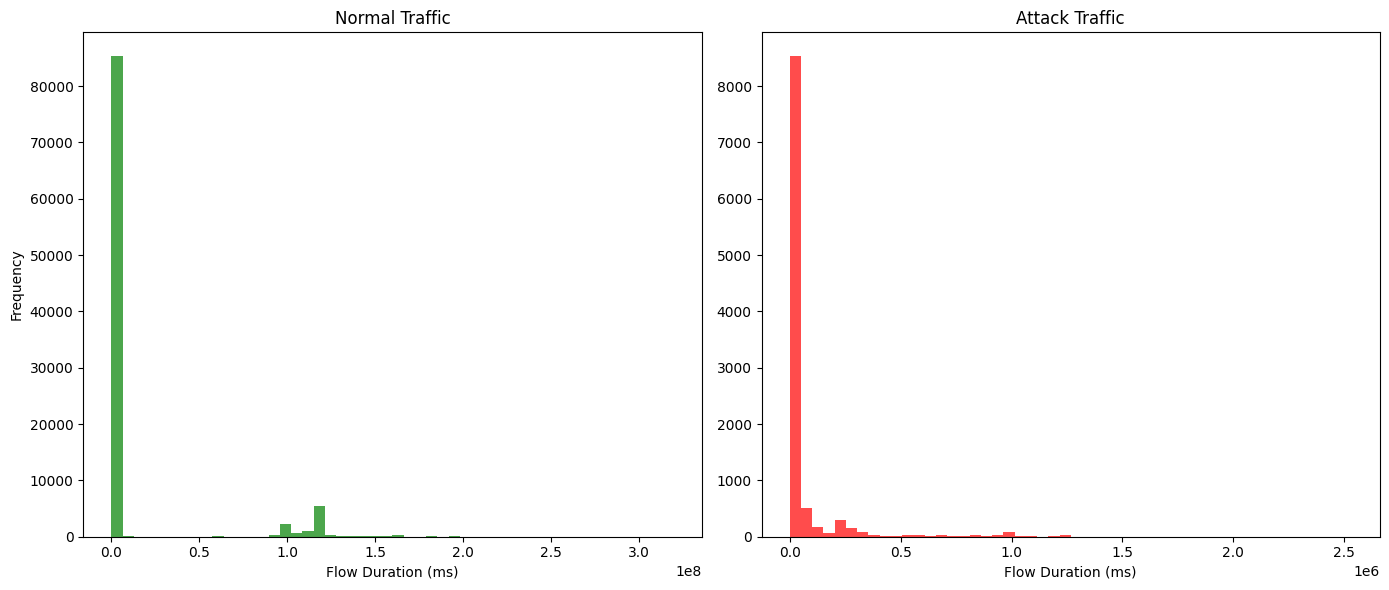

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].hist(normal_traffic['flow_duration'], bins=50, alpha=0.7, color='green')
ax[0].set_title('Normal Traffic')
ax[0].set_xlabel('Flow Duration (ms)')
ax[0].set_ylabel('Frequency')
ax[1].hist(attack_traffic['flow_duration'], bins=50, alpha=0.7, color='red')
ax[1].set_title('Attack Traffic')
ax[1].set_xlabel('Flow Duration (ms)')
plt.tight_layout()
plt.show()

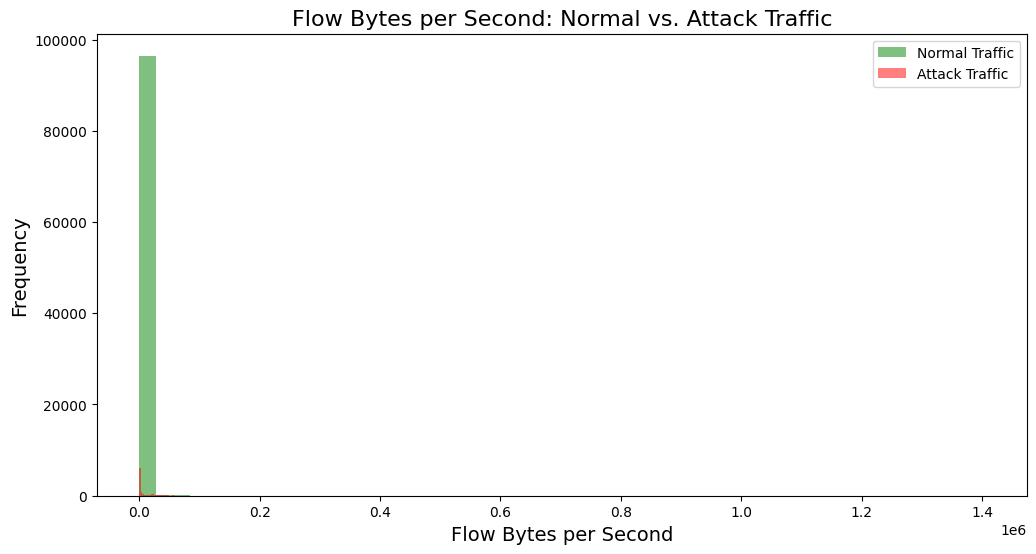

In [ ]:

normal_traffic = data[data['BinLabel'] == 0]
attack_traffic = data[data['BinLabel'] != 0]
plt.figure(figsize=(12, 6))
plt.hist(normal_traffic['flow_byts_s'], bins=50, alpha=0.5, label='Normal Traffic', color='green')
plt.hist(attack_traffic['flow_byts_s'], bins=50, alpha=0.5, label='Attack Traffic', color='red')
plt.xlabel('Flow Bytes per Second', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Flow Bytes per Second: Normal vs. Attack Traffic', fontsize=16)
plt.legend()
plt.show()

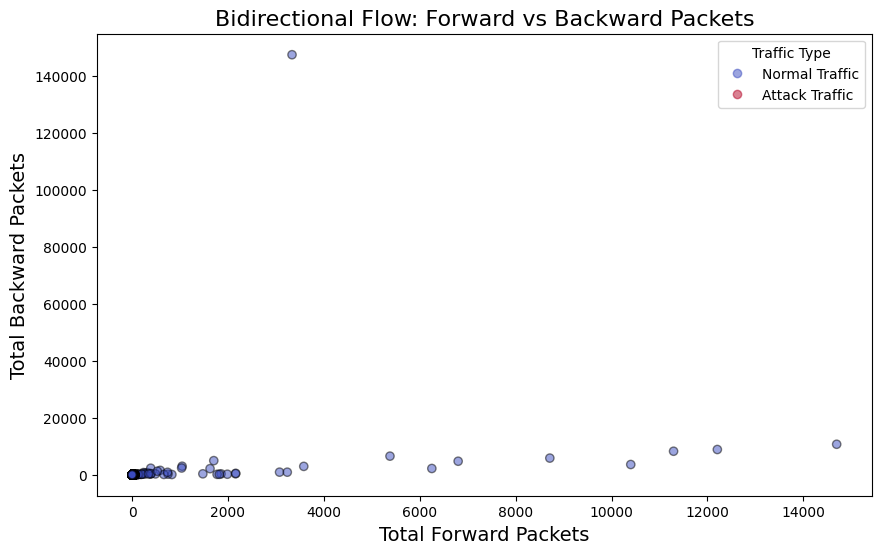

In [ ]:
# Bidirectional Flow Comparison
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['tot_fwd_pkts'],
    data['tot_bwd_pkts'],
    c=data['BinLabel'],
    cmap='coolwarm',
    alpha=0.5,
    edgecolor='k'
)
plt.xlabel('Total Forward Packets', fontsize=14)
plt.ylabel('Total Backward Packets', fontsize=14)
plt.title('Bidirectional Flow: Forward vs Backward Packets', fontsize=16)
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Normal Traffic', 'Attack Traffic'], title="Traffic Type")
plt.show()

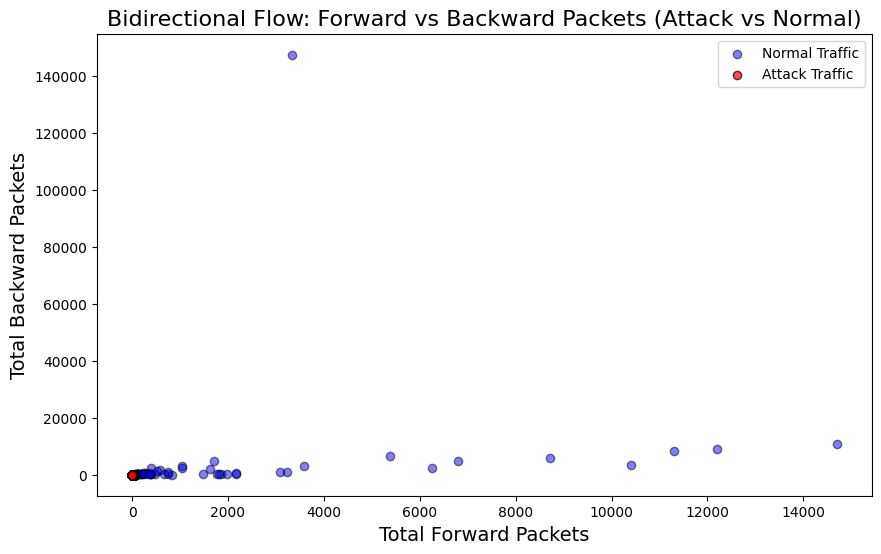

In [ ]:
attack_data = data[data['BinLabel'] == 1]
normal_data = data[data['BinLabel'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data['tot_fwd_pkts'], normal_data['tot_bwd_pkts'], c='blue', label='Normal Traffic', alpha=0.5, edgecolor='k')
plt.scatter(attack_data['tot_fwd_pkts'], attack_data['tot_bwd_pkts'], c='red', label='Attack Traffic', alpha=0.7, edgecolor='k')

plt.xlabel('Total Forward Packets', fontsize=14)
plt.ylabel('Total Backward Packets', fontsize=14)
plt.title('Bidirectional Flow: Forward vs Backward Packets (Attack vs Normal)', fontsize=16)
plt.legend()
plt.show()

In [ ]:
print(data['BinLabel'].value_counts())

BinLabel
0    96763
1    10209
Name: count, dtype: int64


In [ ]:
print(attack_data[['tot_fwd_pkts', 'tot_bwd_pkts']].describe())
print(normal_data[['tot_fwd_pkts', 'tot_bwd_pkts']].describe())

       tot_fwd_pkts  tot_bwd_pkts
count  10209.000000  10209.000000
mean       1.048976      0.597414
std        0.215829      0.490443
min        1.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        1.000000      1.000000
max        2.000000      1.000000
       tot_fwd_pkts   tot_bwd_pkts
count  96763.000000   96763.000000
mean       3.480029       2.572853
std       95.019985     478.431523
min        1.000000       0.000000
25%        1.000000       0.000000
50%        1.000000       0.000000
75%        1.000000       0.000000
max    14696.000000  147329.000000


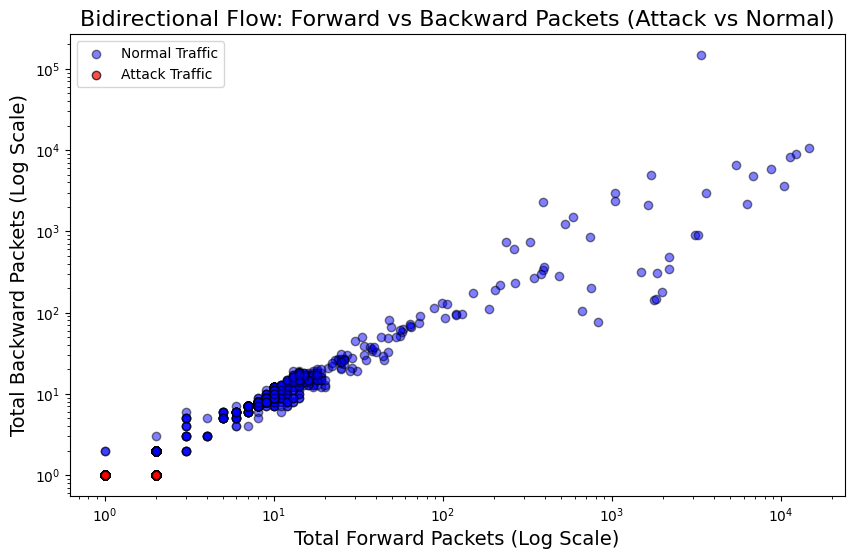

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(normal_data['tot_fwd_pkts'], normal_data['tot_bwd_pkts'], c='blue', label='Normal Traffic', alpha=0.5, edgecolor='k')
plt.scatter(attack_data['tot_fwd_pkts'], attack_data['tot_bwd_pkts'], c='red', label='Attack Traffic', alpha=0.7, edgecolor='k')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Total Forward Packets (Log Scale)', fontsize=14)
plt.ylabel('Total Backward Packets (Log Scale)', fontsize=14)
plt.title('Bidirectional Flow: Forward vs Backward Packets (Attack vs Normal)', fontsize=16)
plt.legend()
plt.show()

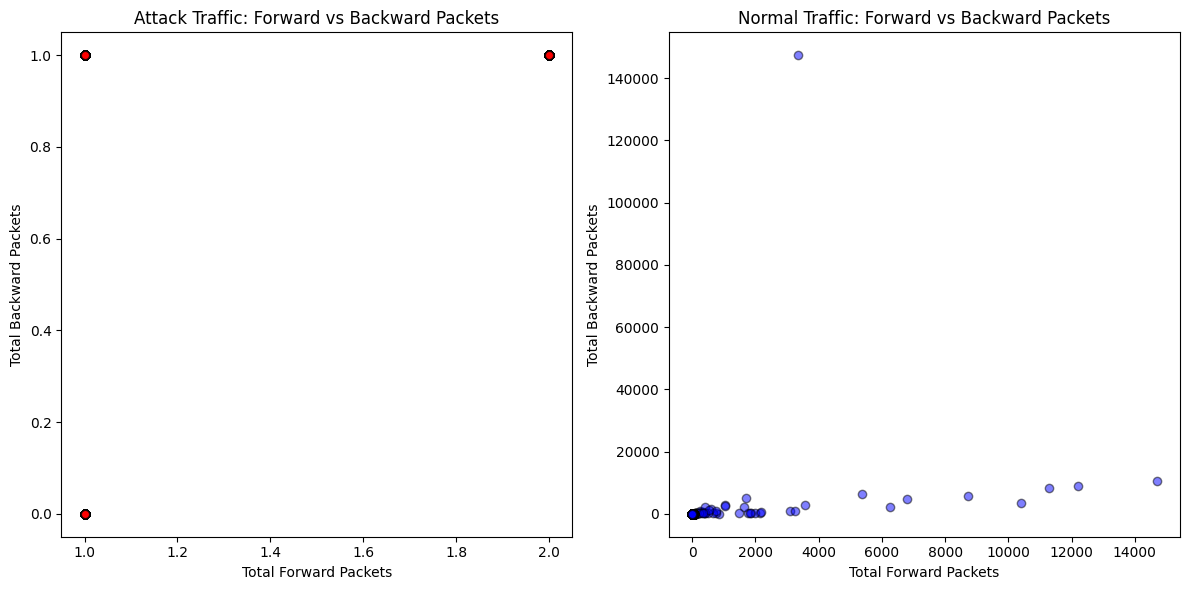

In [ ]:
plt.figure(figsize=(12, 6))

# Attack Traffic Plot
plt.subplot(1, 2, 1)
plt.scatter(attack_data['tot_fwd_pkts'], attack_data['tot_bwd_pkts'], c='red', label='Attack Traffic', alpha=0.7, edgecolor='k')
plt.title('Attack Traffic: Forward vs Backward Packets')
plt.xlabel('Total Forward Packets')
plt.ylabel('Total Backward Packets')

# Normal Traffic Plot
plt.subplot(1, 2, 2)
plt.scatter(normal_data['tot_fwd_pkts'], normal_data['tot_bwd_pkts'], c='blue', label='Normal Traffic', alpha=0.5, edgecolor='k')
plt.title('Normal Traffic: Forward vs Backward Packets')
plt.xlabel('Total Forward Packets')
plt.ylabel('Total Backward Packets')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Label'])

print(data['Attack Number'].unique())

[0 4 2 3 1]


In [ ]:
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: Benign
1: HTTPAttack
2: TCPAttack
3: UDPAttack
4: XMasAttack


In [ ]:
correlation = data.corr(numeric_only = True).round(2)
correlation.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

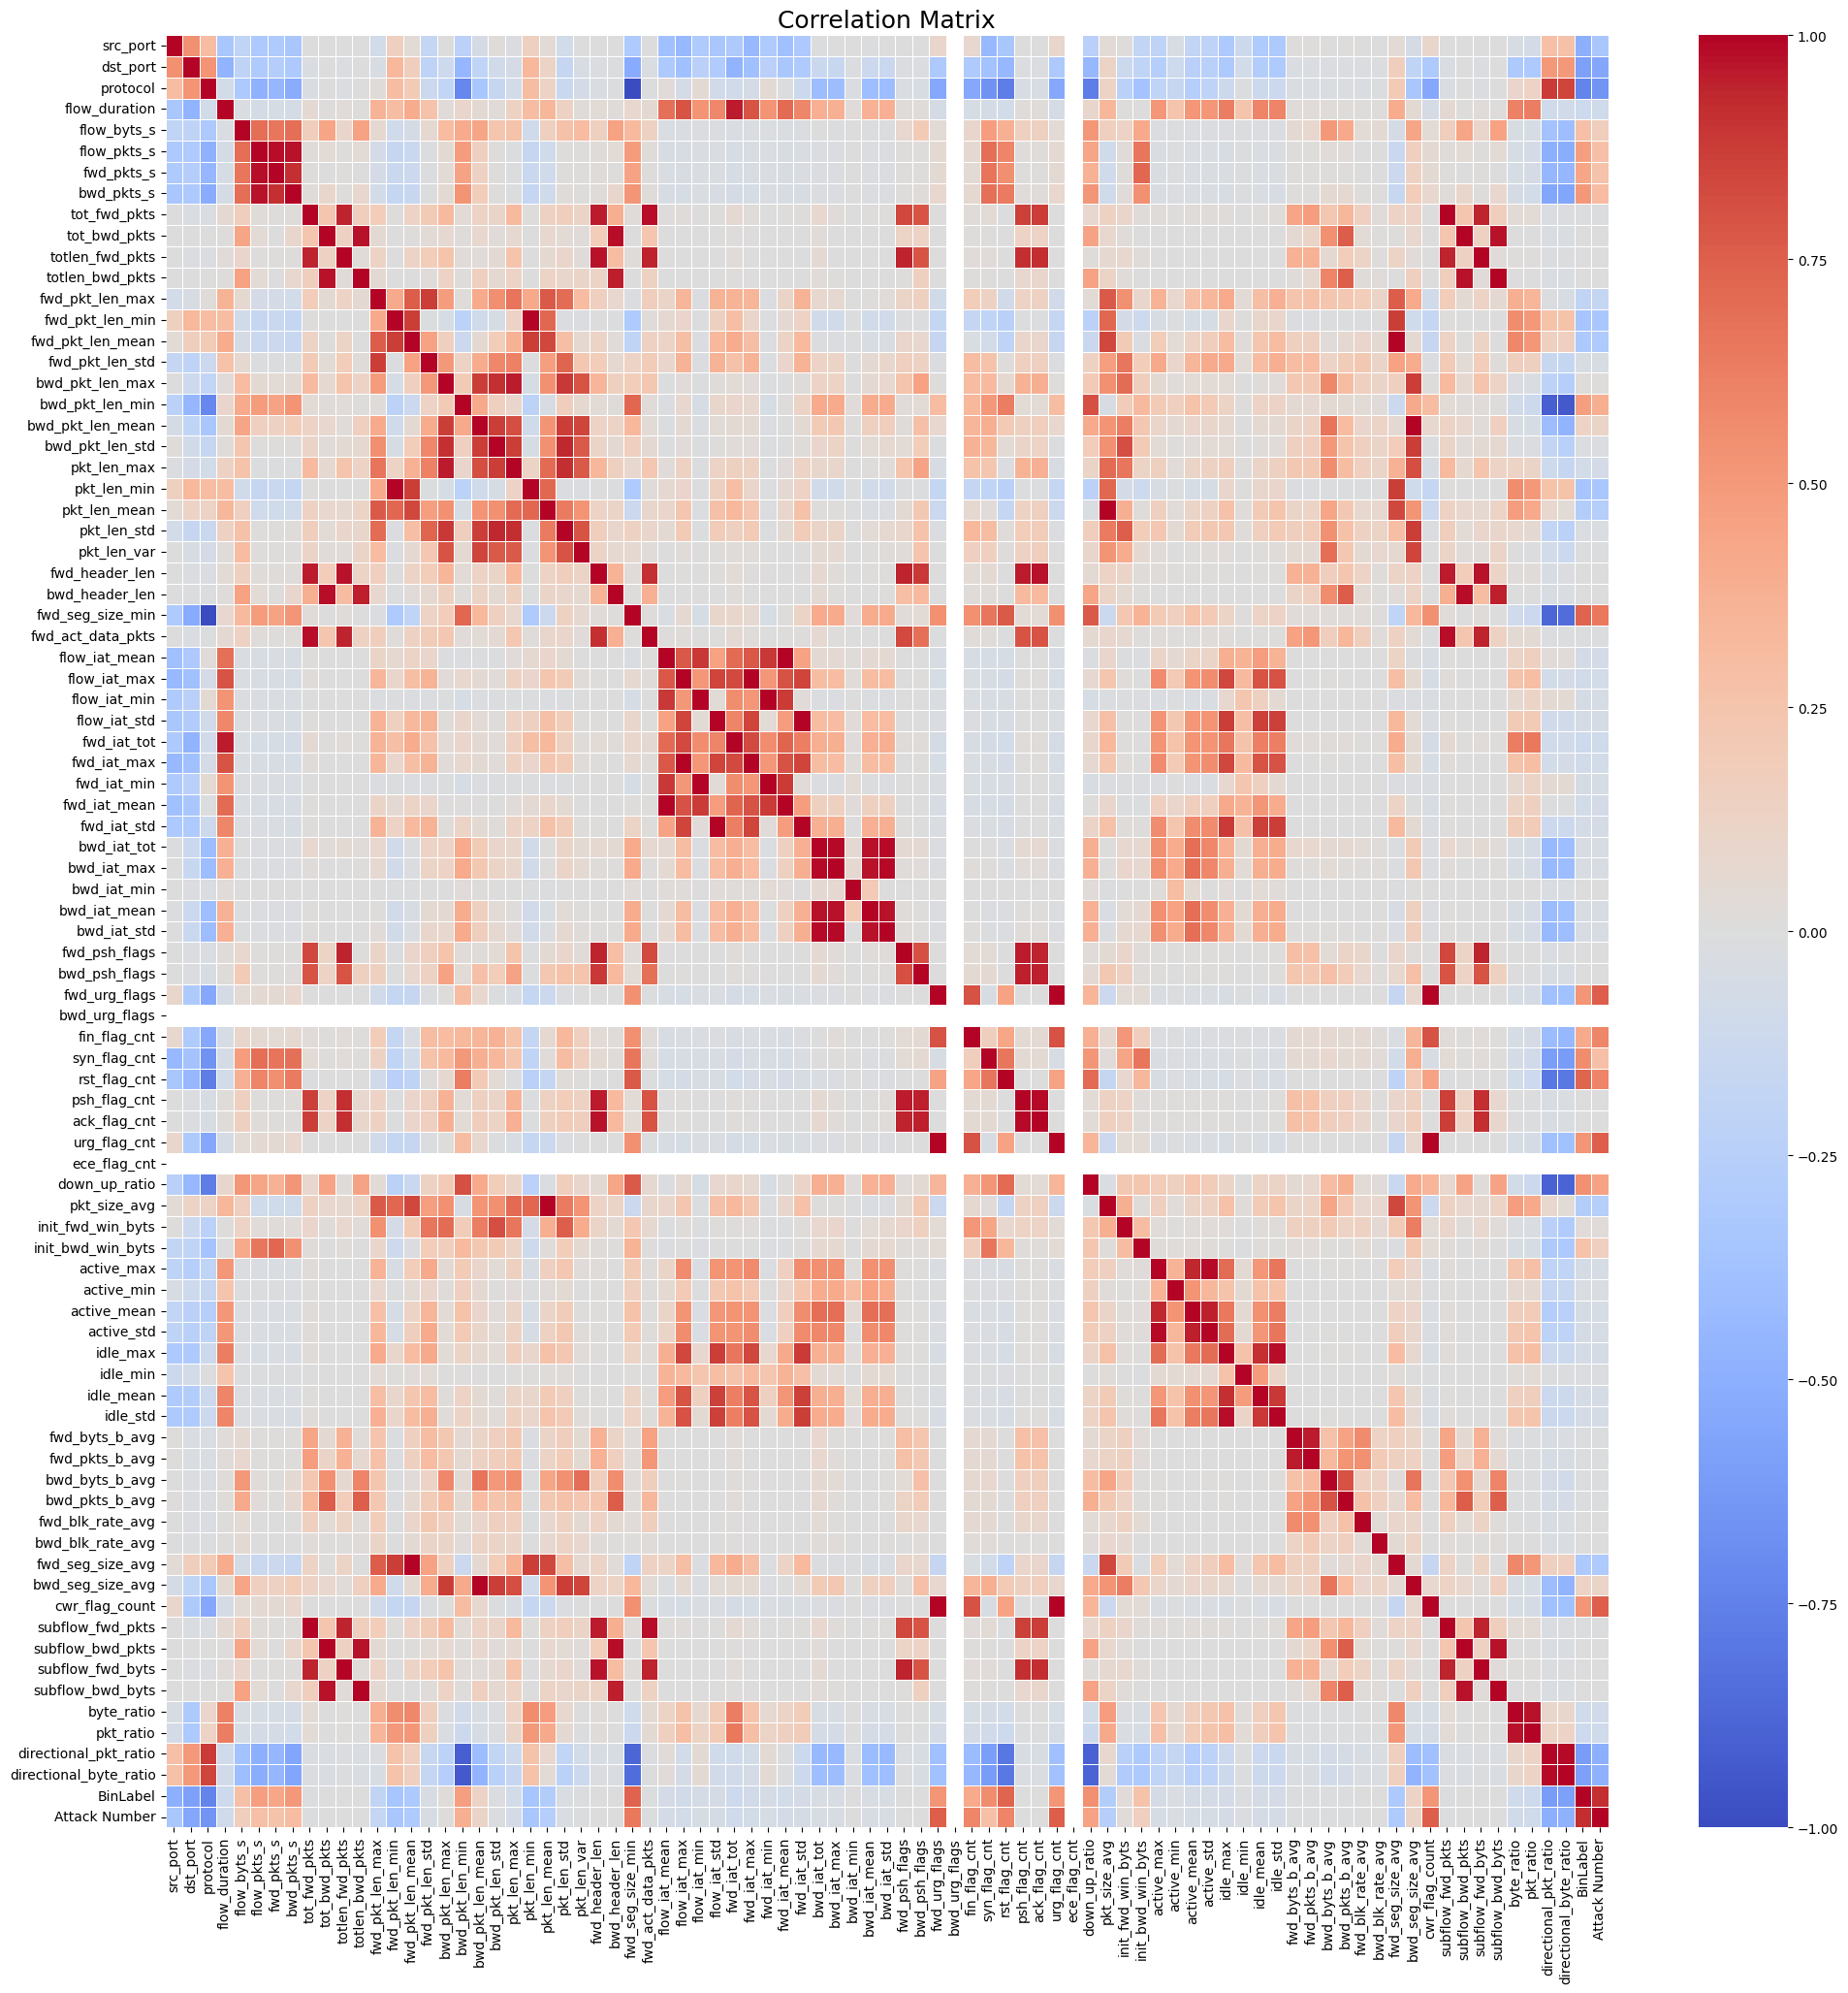

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(correlation, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features w.r.t Attacks
positive_correlation = correlation['Attack Number'][(correlation['Attack Number'] > 0) & (correlation['Attack Number'] < 1)].index.tolist()

print("Positive correlation features w.r.t Attacks:\n")
for i, features in enumerate(positive_correlation, start = 1):
    correlation_value = correlation.loc[features, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', features, correlation_value))

Positive correlation features w.r.t Attacks:

1.  flow_byts_s              :0.17
2.  flow_pkts_s              :0.28
3.  fwd_pkts_s               :0.26
4.  bwd_pkts_s               :0.31
5.  bwd_pkt_len_max          :0.01
6.  bwd_pkt_len_min          :0.39
7.  bwd_pkt_len_mean         :0.11
8.  fwd_seg_size_min         :0.65
9.  fwd_urg_flags            :0.75
10. fin_flag_cnt             :0.59
11. syn_flag_cnt             :0.28
12. rst_flag_cnt             :0.6
13. urg_flag_cnt             :0.75
14. down_up_ratio            :0.45
15. init_fwd_win_byts        :0.03
16. init_bwd_win_byts        :0.16
17. bwd_seg_size_avg         :0.11
18. cwr_flag_count           :0.75
19. BinLabel                 :0.92


In [ ]:
print(f'No of important features: {len(positive_correlation)}')

No of important features: 19


In [ ]:
# Zero standard deviation
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['bwd_urg_flags', 'ece_flag_cnt']

In [ ]:
# Unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count on Data: ')
for i, feature in enumerate(list(data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, data[feature].nunique()))

Unique value count on Data: 
1.  src_ip                        : 31
2.  dst_ip                        : 113
3.  src_port                      : 28718
4.  dst_port                      : 172
5.  protocol                      : 2
6.  timestamp                     : 4317
7.  flow_duration                 : 16398
8.  flow_byts_s                   : 17552
9.  flow_pkts_s                   : 16425
10. fwd_pkts_s                    : 16428
11. bwd_pkts_s                    : 7936
12. tot_fwd_pkts                  : 112
13. tot_bwd_pkts                  : 99
14. totlen_fwd_pkts               : 1425
15. totlen_bwd_pkts               : 373
16. fwd_pkt_len_max               : 133
17. fwd_pkt_len_min               : 81
18. fwd_pkt_len_mean              : 1291
19. fwd_pkt_len_std               : 1333
20. bwd_pkt_len_max               : 169
21. bwd_pkt_len_min               : 70
22. bwd_pkt_len_mean              : 368
23. bwd_pkt_len_std               : 332
24. pkt_len_max                   : 233
25

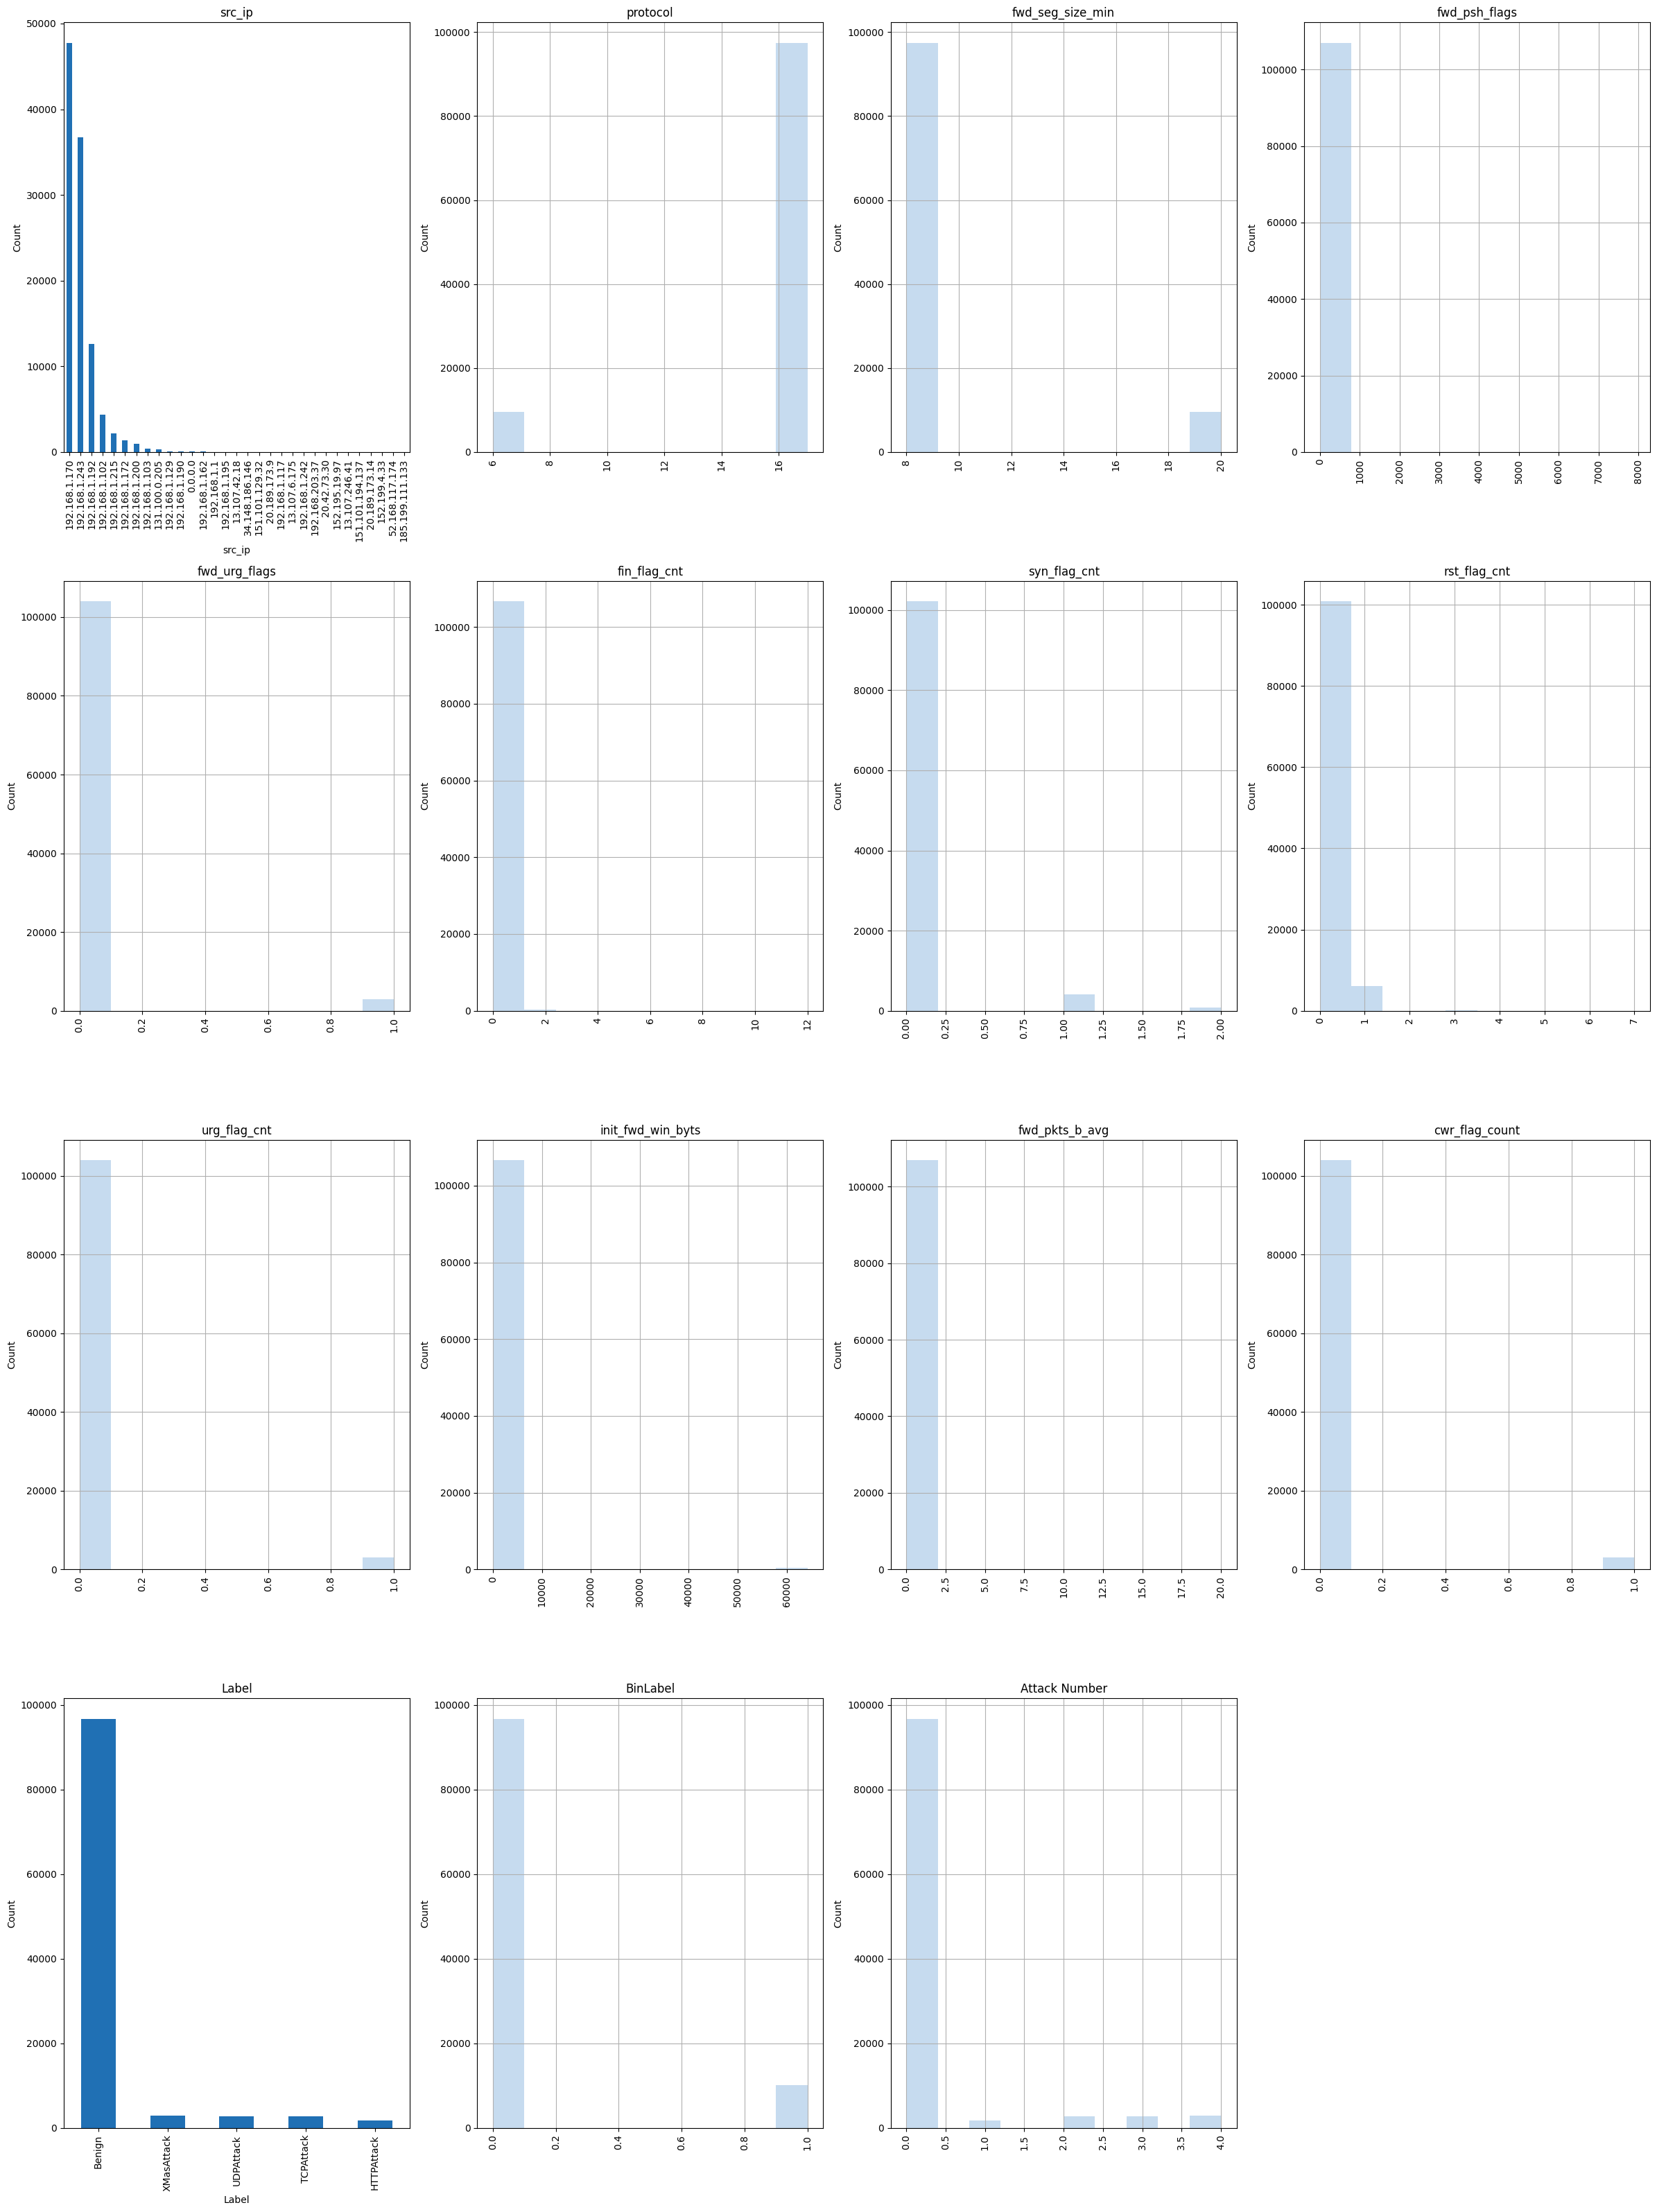

In [ ]:
unique_values = data.nunique()
selected_cols = data[[col for col in data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
drop_columns = [
    "BinLabel"
   ]
data.drop(columns=drop_columns, inplace=True, errors='ignore')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


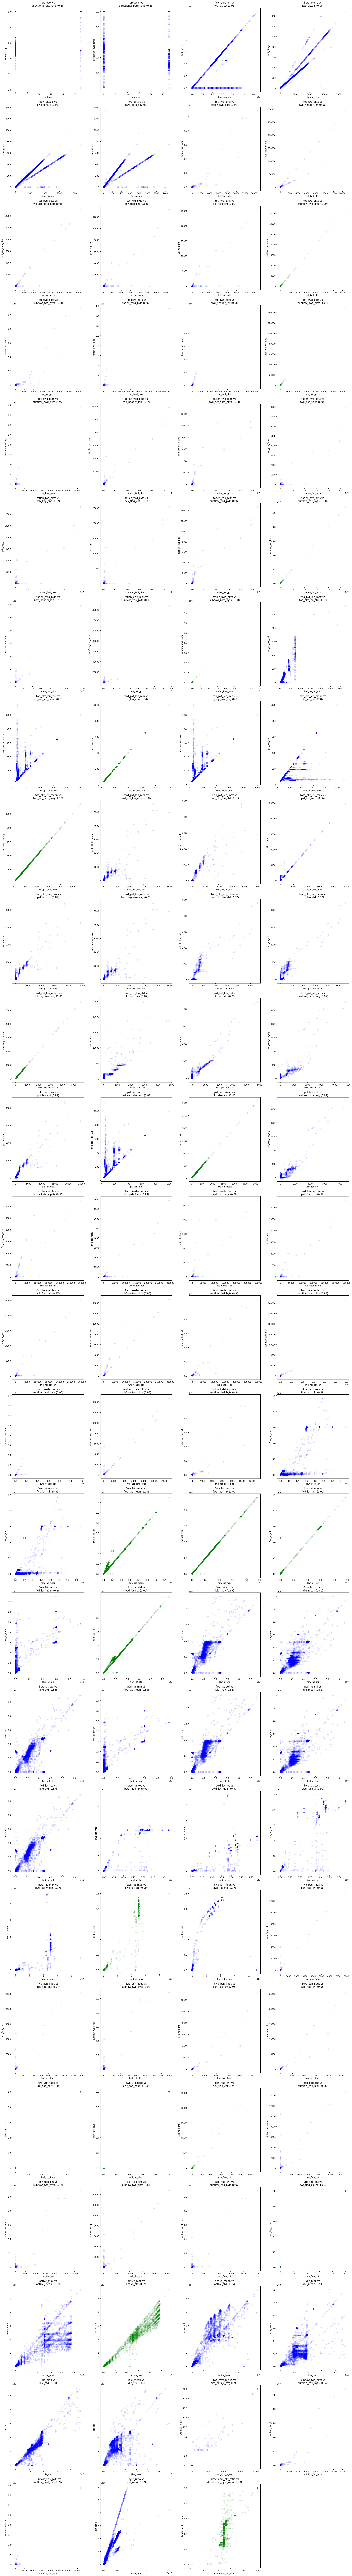

In [ ]:
cols = data.select_dtypes(include=[np.number]).columns
high_corr_pairs = []
corr_th = 0.85

# Correlations for numeric columns
for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = data[cols[i]].corr(data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

# Correlation pairs
size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(data[x], data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(data[x], data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [ ]:
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# Outliers
numeric_data = data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']
print(outlier_stats)

                        Outlier Count  Outlier Percentage
src_port                        14494               13.55
dst_port                            0                0.00
protocol                         9536                8.91
flow_duration                   18539               17.33
flow_byts_s                     18539               17.33
...                               ...                 ...
subflow_bwd_byts                 8711                8.14
byte_ratio                       9552                8.93
pkt_ratio                       18539               17.33
directional_pkt_ratio           18539               17.33
directional_byte_ratio           8711                8.14

[83 rows x 2 columns]


In [ ]:
# Outliers w.r.t attack type
outlier_counts = {}
for i in numeric_data:
    for label in data['Label'].unique():
        attack_data = data[i][data['Label'] == label]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, label)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for label in data['Label'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, label)]
    print(f'- {label}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: src_port
- Benign: 7299 (7.54%)
- XMasAttack: 0 (0.00%)
- TCPAttack: 0 (0.00%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 0 (0.00%)

Feature: dst_port
- Benign: 0 (0.00%)
- XMasAttack: 0 (0.00%)
- TCPAttack: 0 (0.00%)
- UDPAttack: 0 (0.00%)
- HTTPAttack: 0 (0.00%)

Feature: protocol
- Benign: 2028 (2.10%)
- XMasAttack: 0 (0.00%)
- TCPAttack: 0 (0.00%)
- UDPAttack: 0 (0.00%)
- HTTPAttack: 0 (0.00%)

Feature: flow_duration
- Benign: 12440 (12.86%)
- XMasAttack: 284 (9.44%)
- TCPAttack: 519 (19.22%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 365 (20.28%)

Feature: flow_byts_s
- Benign: 12440 (12.86%)
- XMasAttack: 179 (5.95%)
- TCPAttack: 137 (5.07%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 36 (2.00%)

Feature: flow_pkts_s
- Benign: 12440 (12.86%)
- XMasAttack: 156 (5.19%)
- TCPAttack: 131 (4.85%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 33 (1.83%)

Feature: fwd_pkts_s
- Benign: 12440 (12.86%)
- XMasAttack: 156 (5.19%)
- TCPAttack: 172 (6.37%)
- UDPAttack: 1 (0.04%)
- HTTPAttack: 52 (2.89%)

Feature

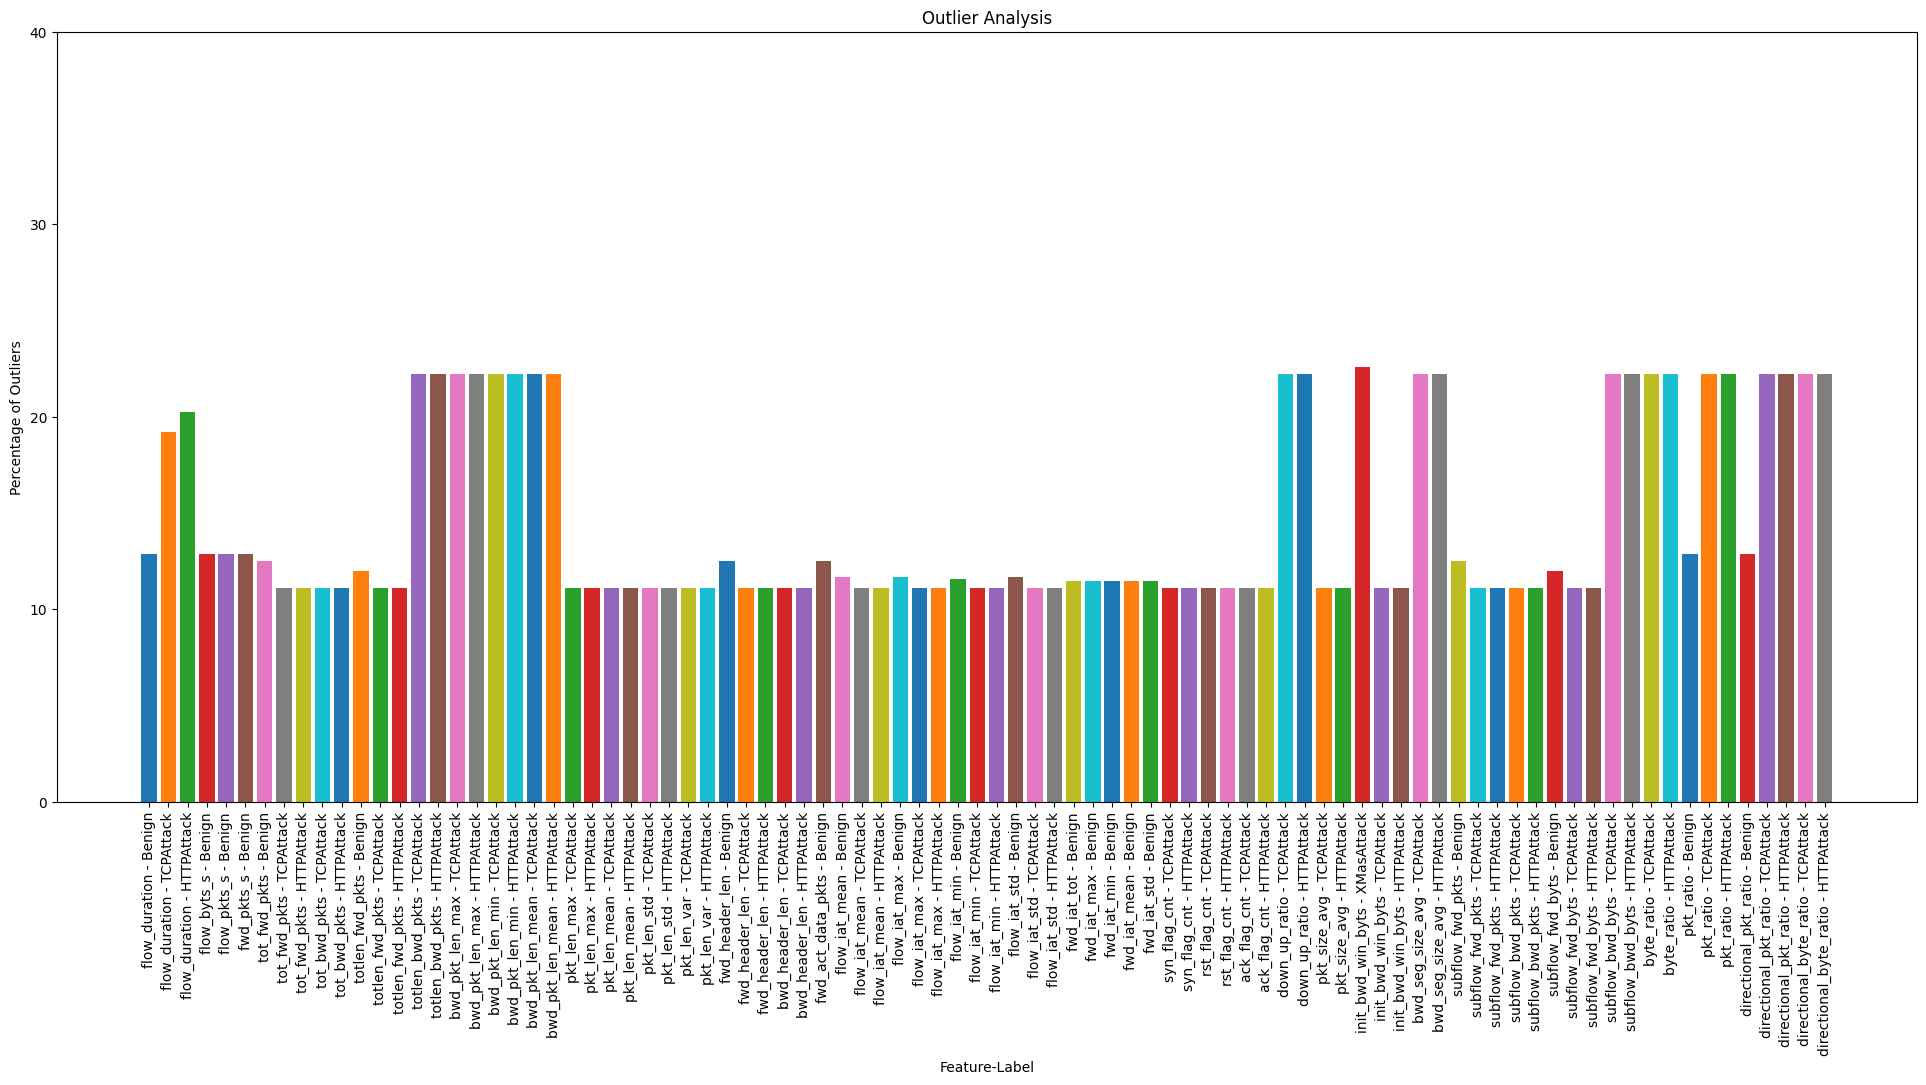

In [ ]:
# % of outliers > 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for label in data['Label'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, label)]
        if outlier_percent > 10:
            ax.bar(f'{i} - {label}', outlier_percent)

ax.set_xlabel('Feature-Label')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

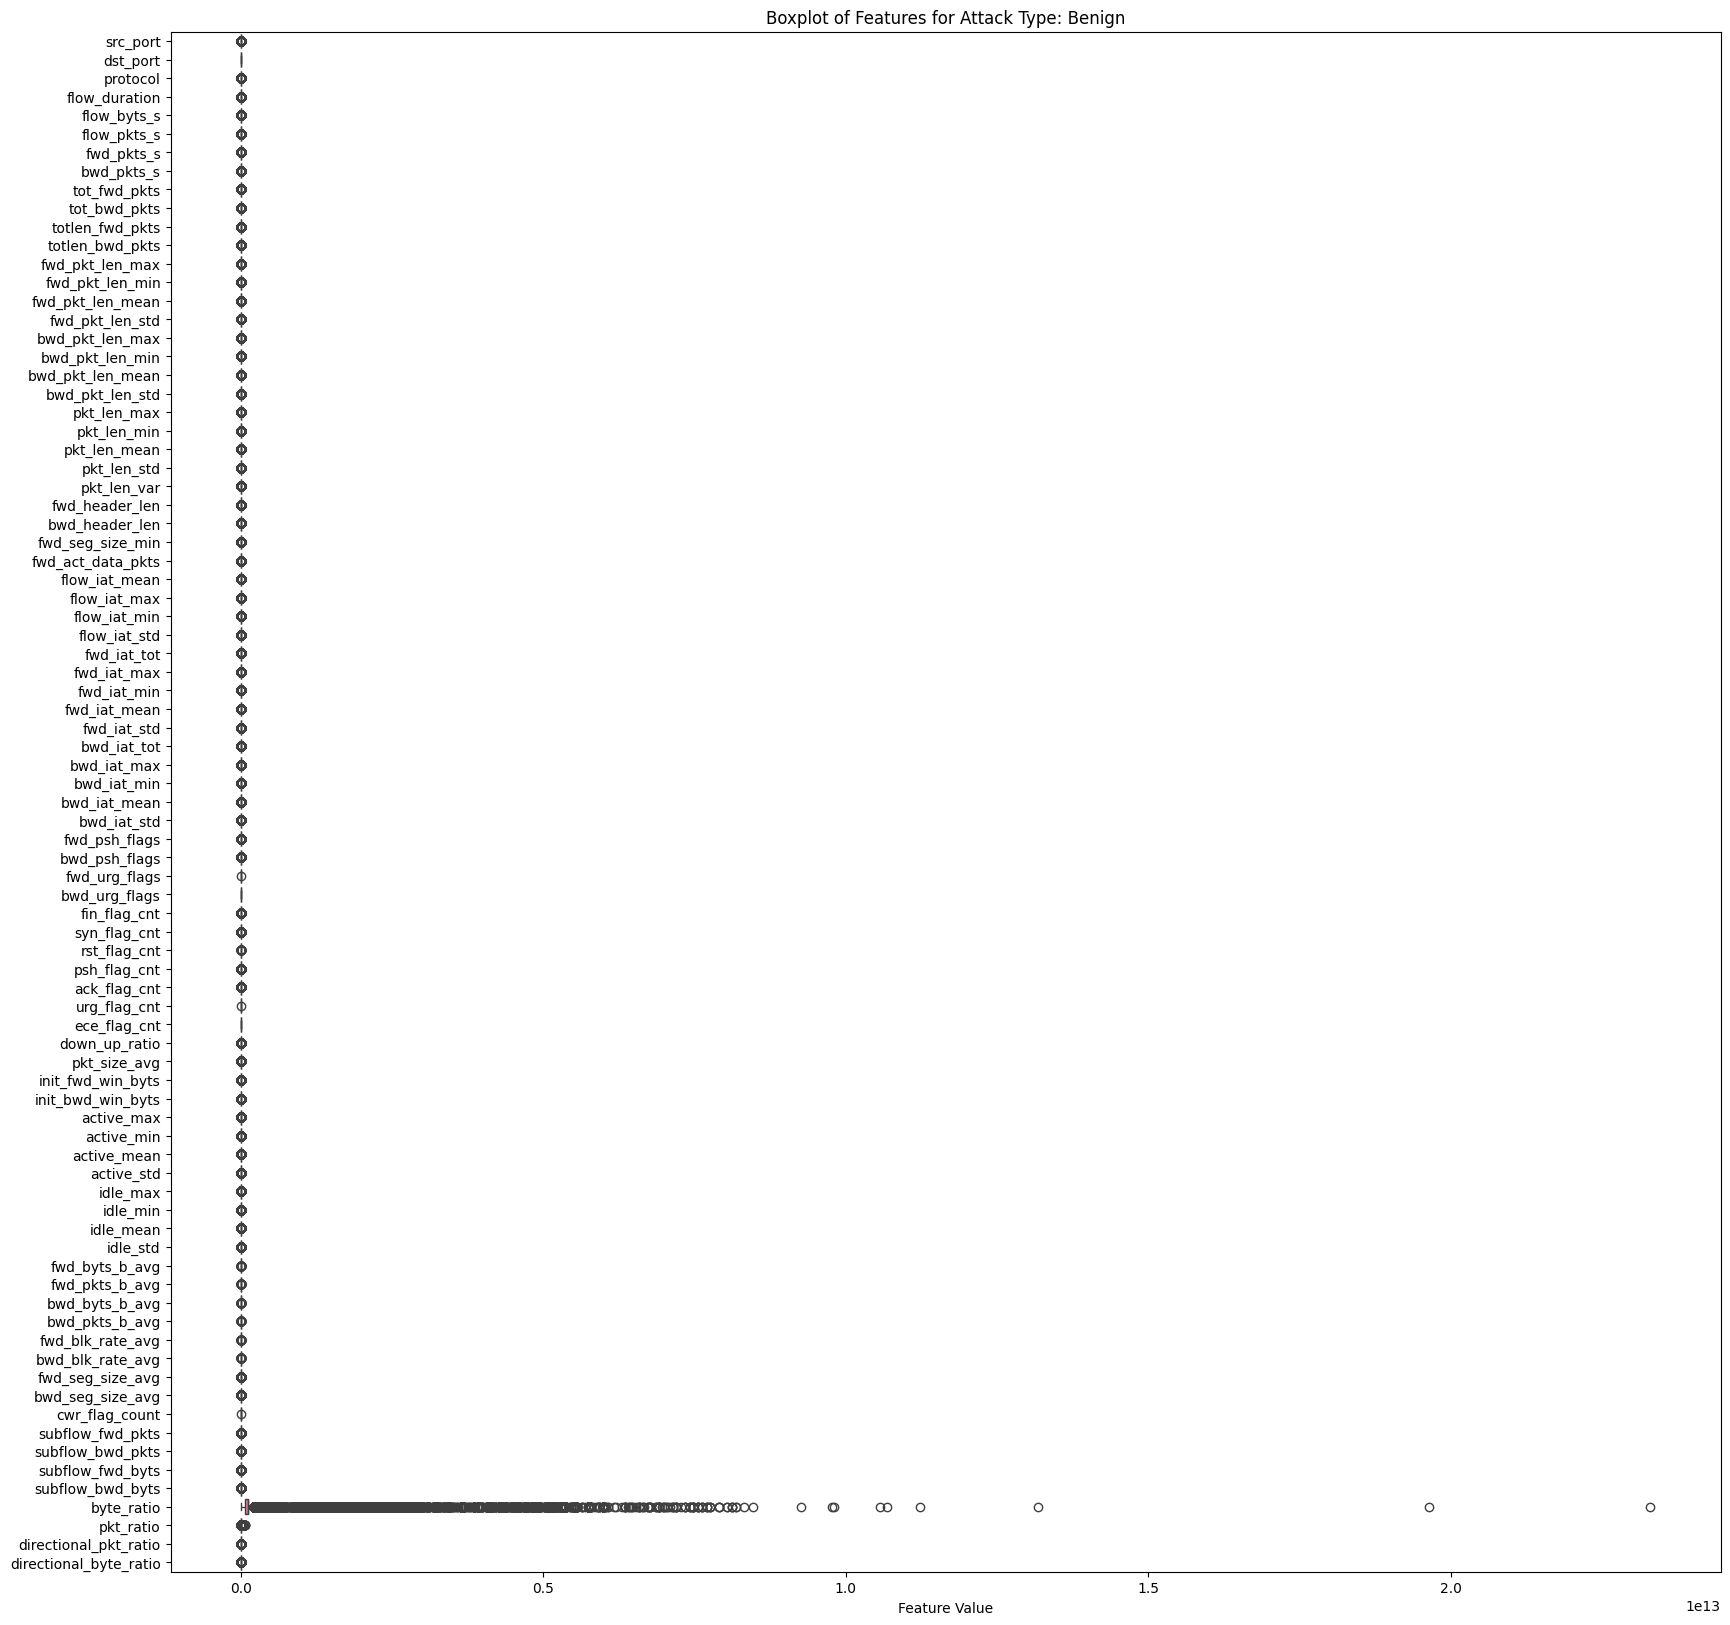

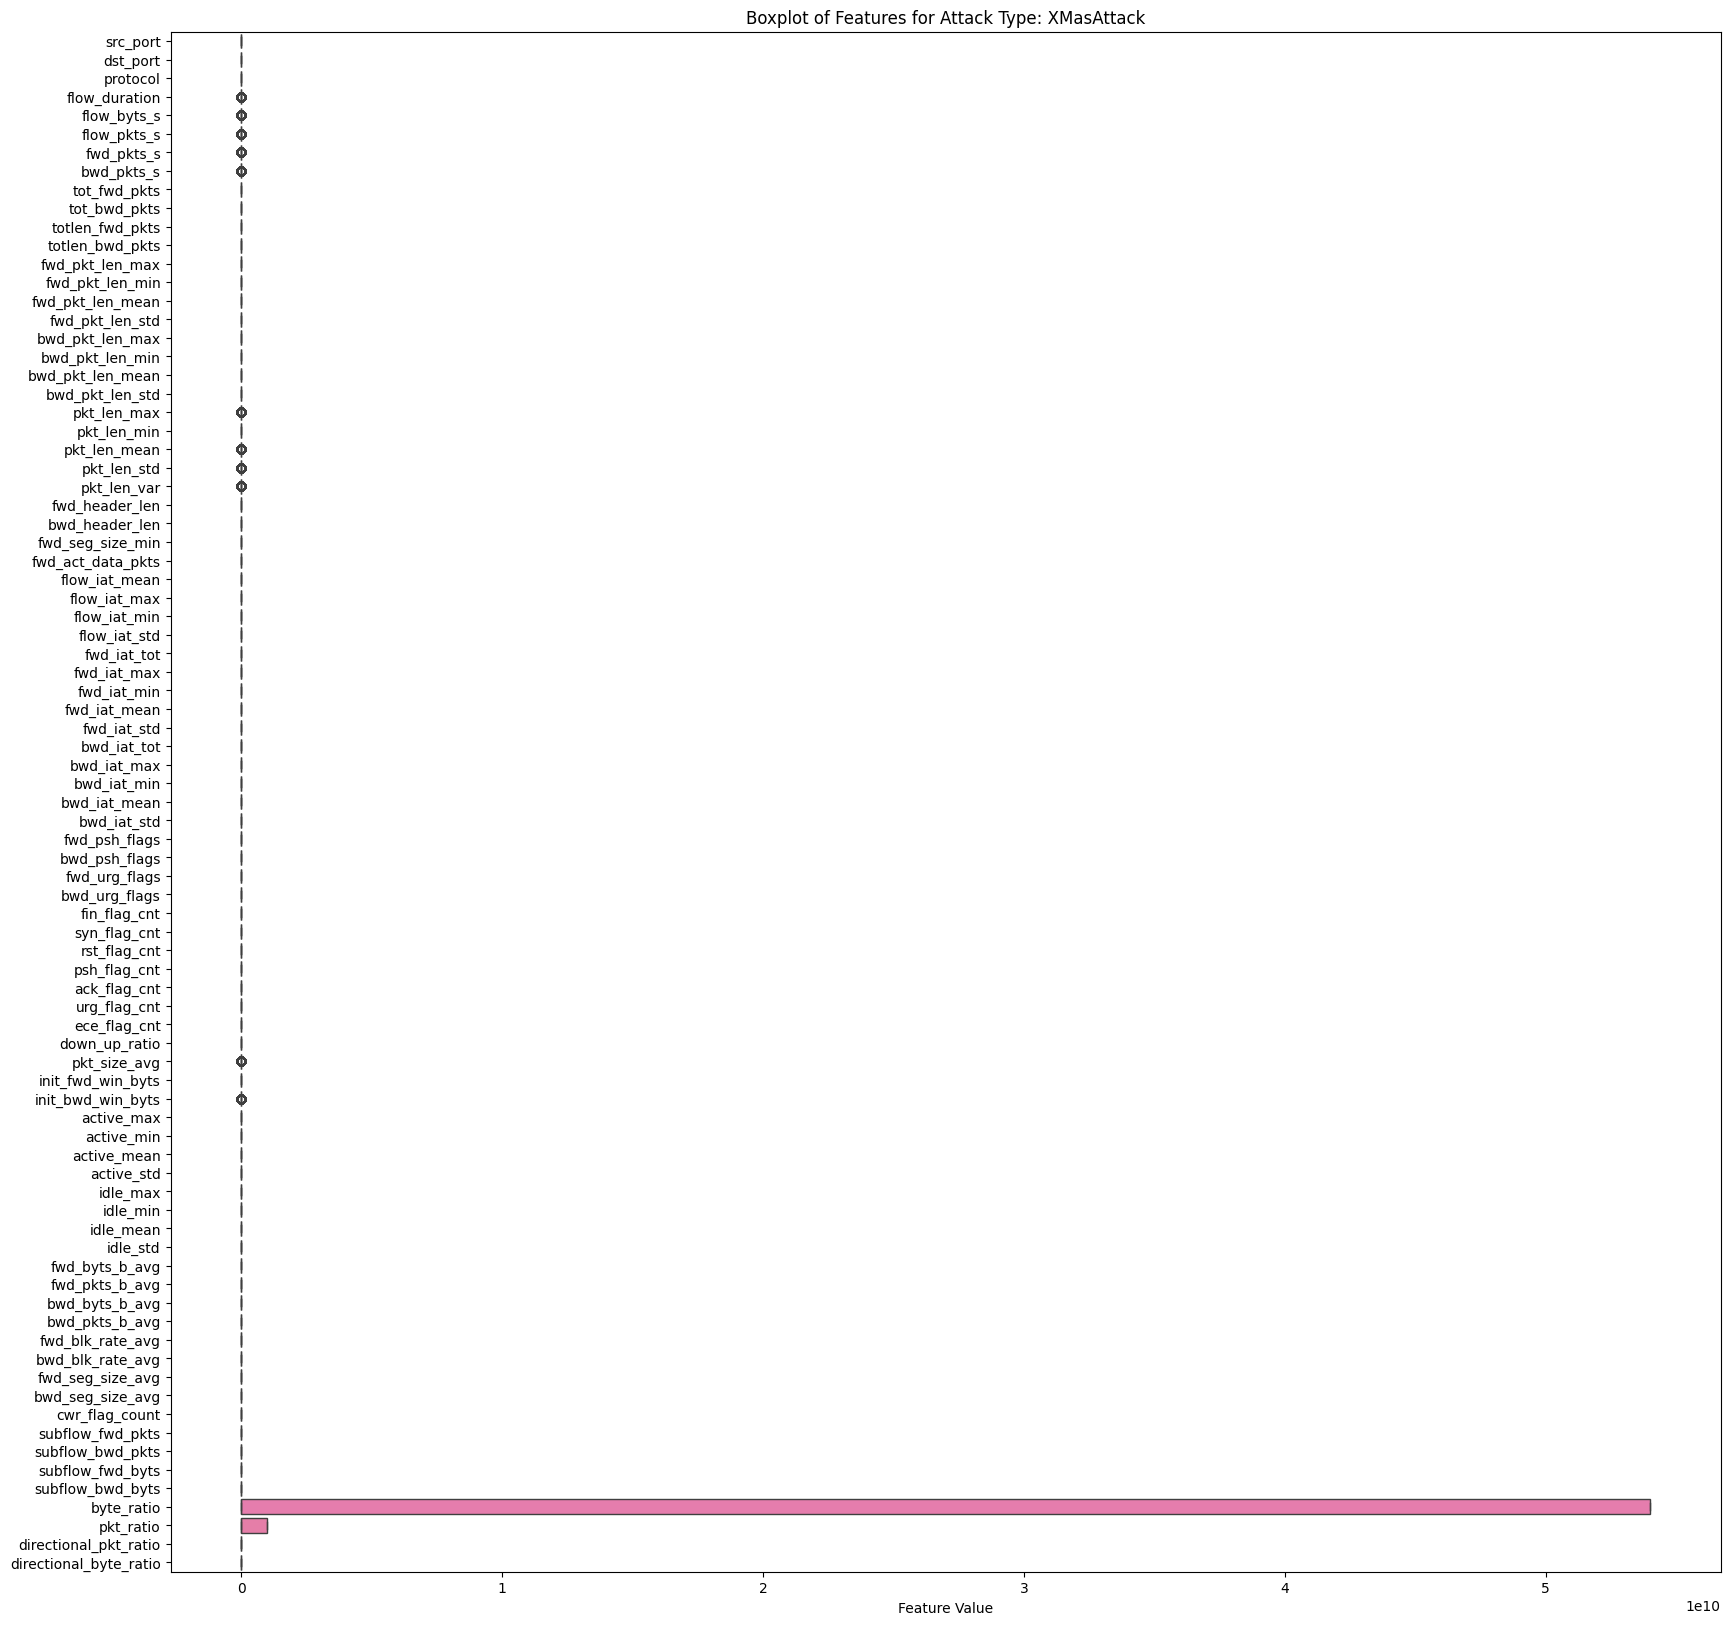

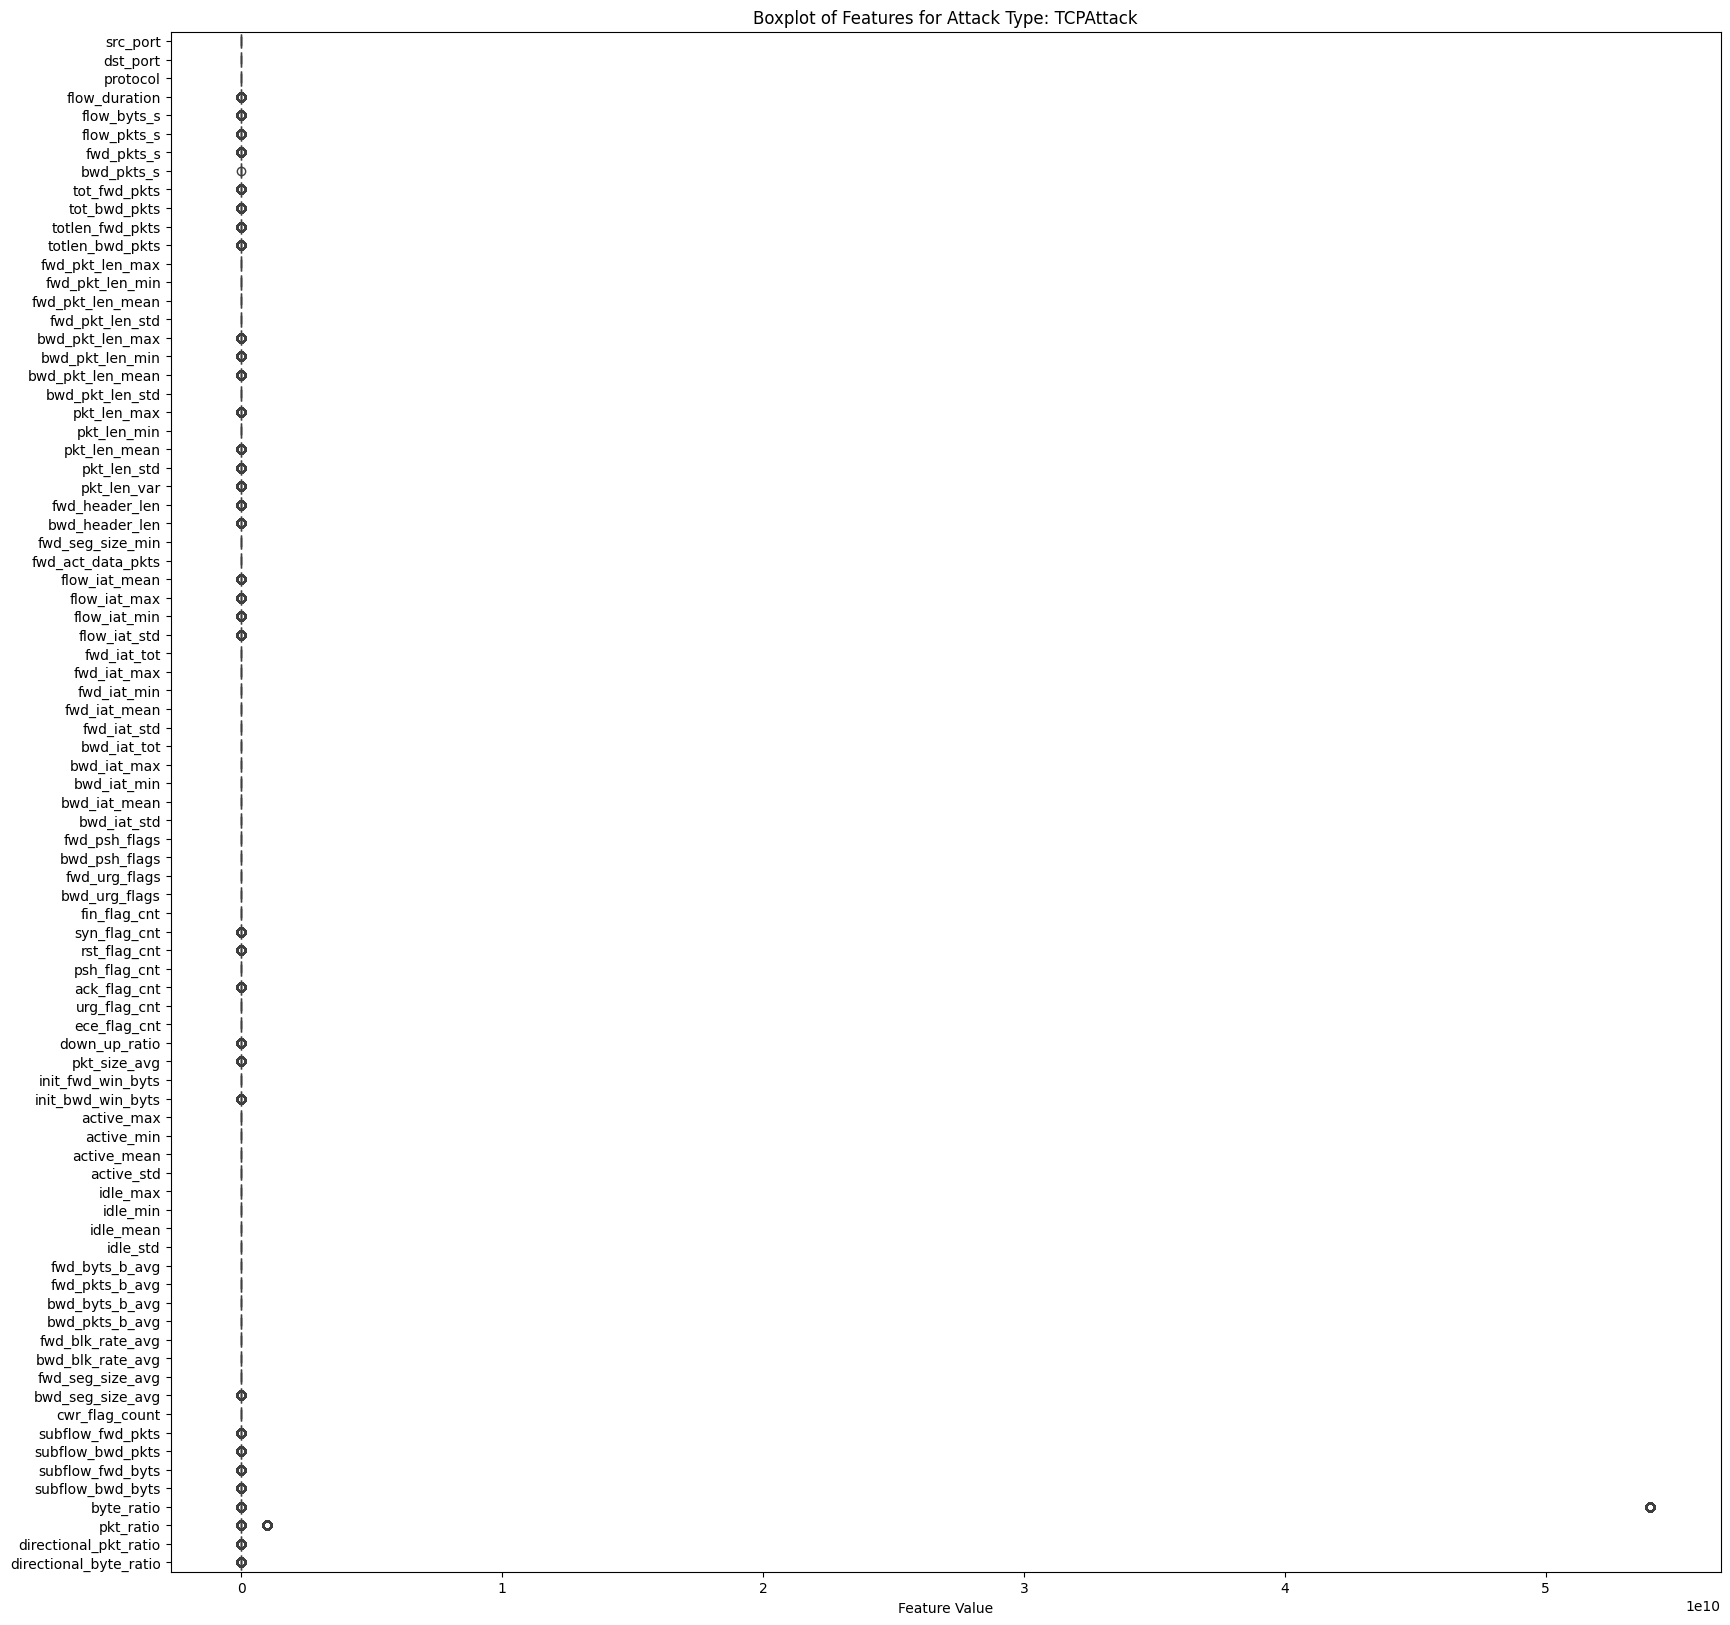

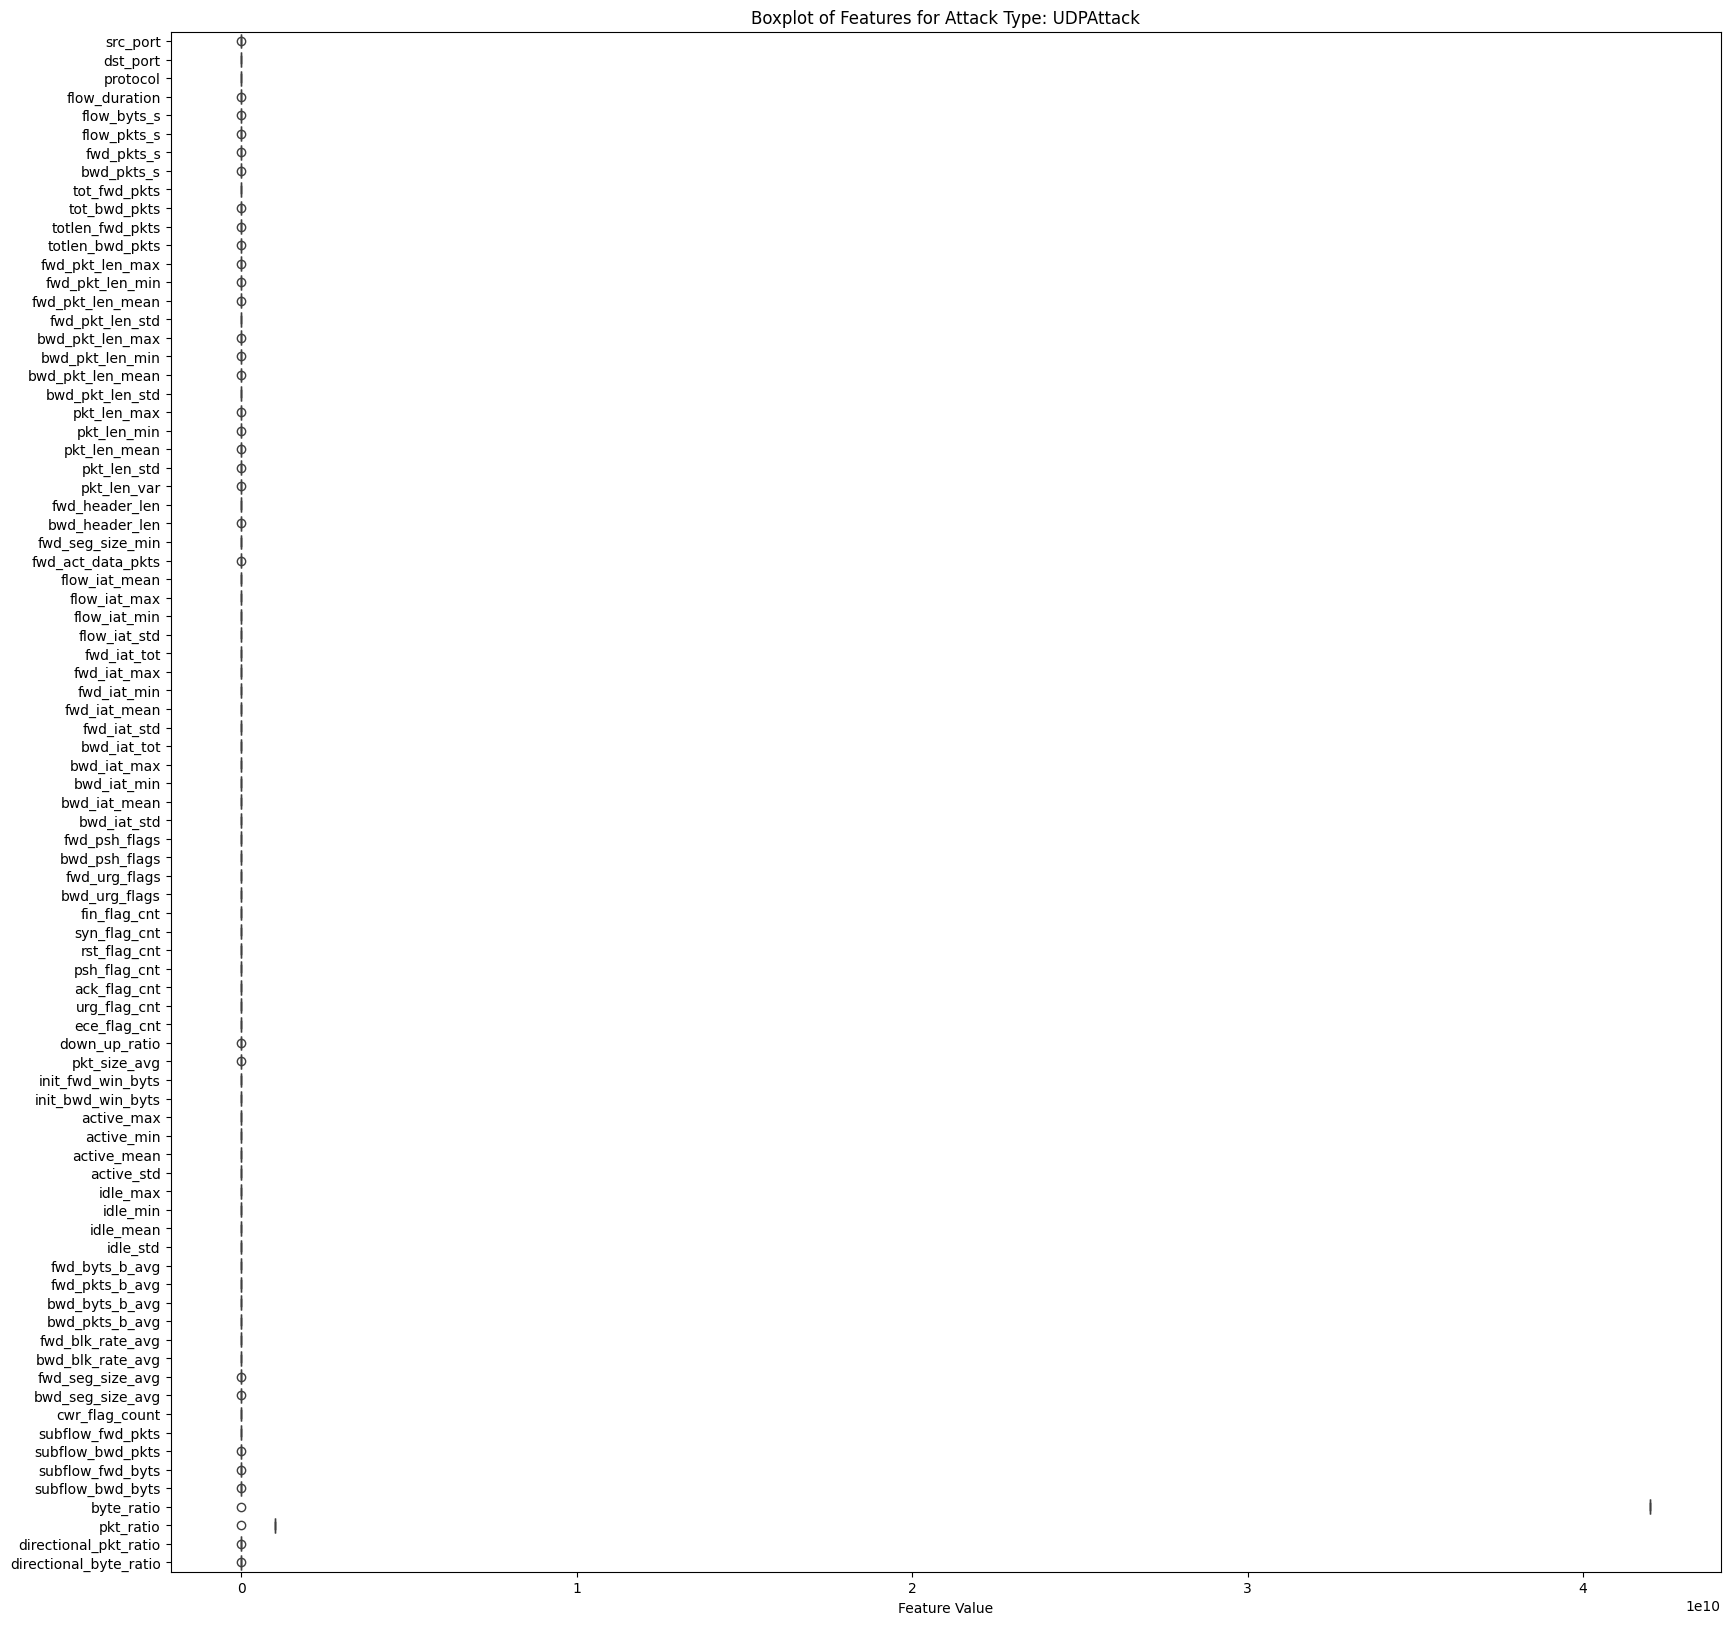

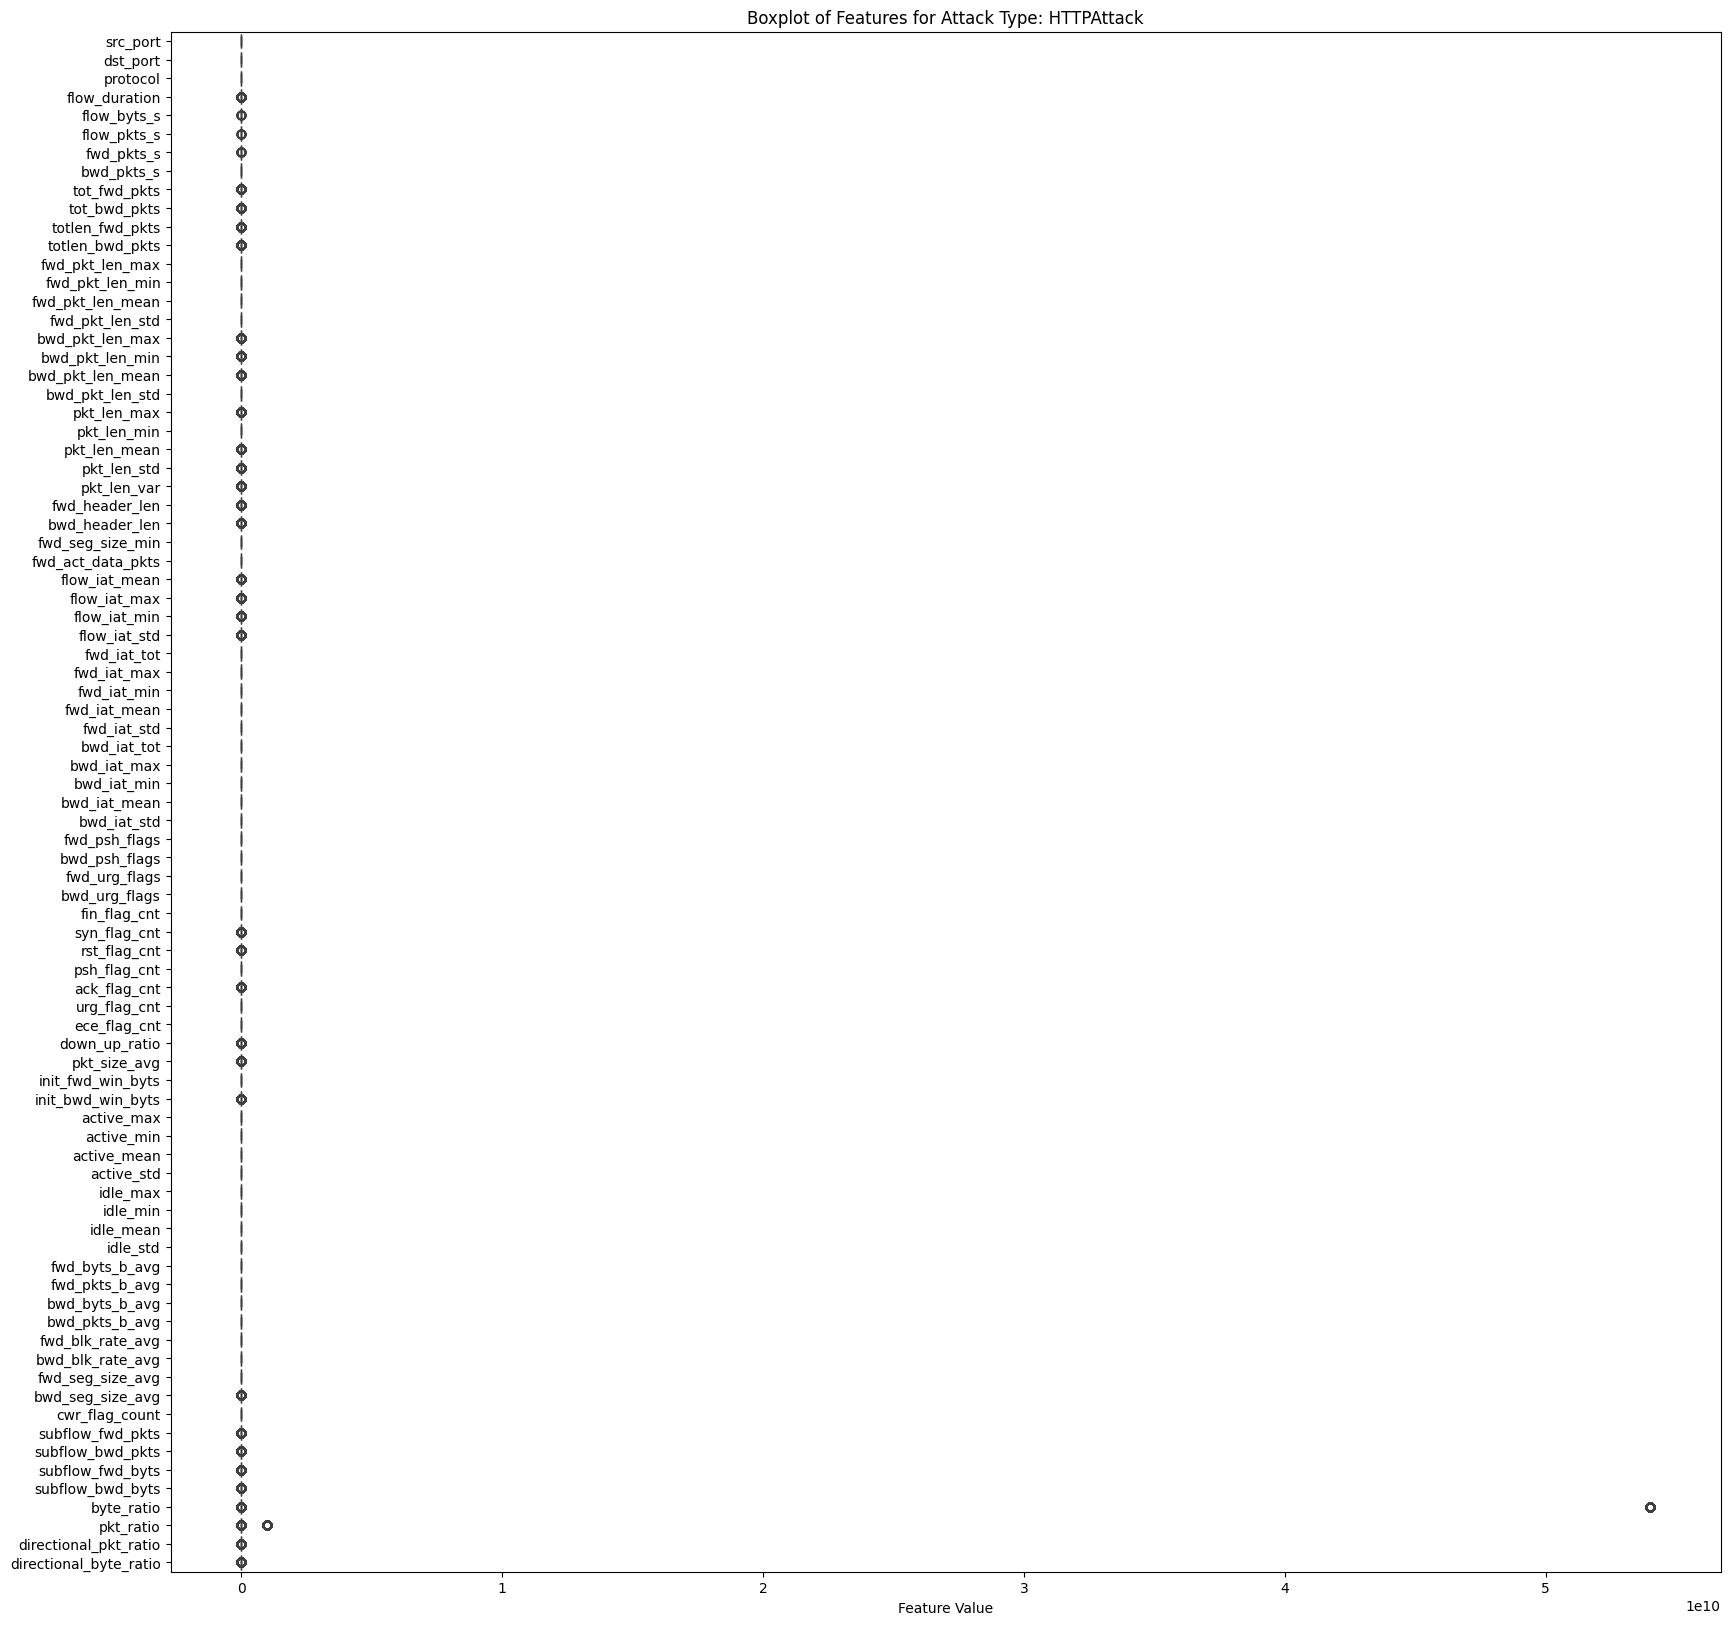

In [ ]:
for attack_type in data['Label'].unique():
    attack_data = data[data['Label'] == attack_type]

    plt.figure(figsize=(20, 20))

    sns.boxplot(data = attack_data.drop(columns = ['Label']), orient = 'h')

    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')

    plt.show()

In [ ]:
data.groupby('Label').first()

src_ip           dst_ip  src_port  dst_port  protocol  \
Label                                                                      
Benign      192.168.1.215  255.255.255.255     49154      6667        17   
HTTPAttack  192.168.1.192    192.168.1.103      1336        80         6   
TCPAttack   192.168.1.192    192.168.1.103      2007       443         6   
UDPAttack   192.168.1.192    192.168.1.103      1869        53        17   
XMasAttack  192.168.1.192    192.168.1.103     41750        25         6   

                     timestamp  flow_duration  flow_byts_s  flow_pkts_s  \
Label                                                                     
Benign     2024-08-14 08:00:00      120013552    42.161905     0.183313   
HTTPAttack 2024-08-14 14:00:00              0     0.000000     0.000000   
TCPAttack  2024-08-14 09:57:00              0     0.000000     0.000000   
UDPAttack  2024-08-14 11:59:00              0     0.000000     0.000000   
XMasAttack 2024-08-14 08:00:00              0     0.000000     0.000000   

            fwd_pkts_s  ...  bwd_seg_size_avg  cwr_flag_count  \
Label                   ...                                     
Benign        0.183313  ...               0.0               0   
HTTPAttack    0.000000  ...               0.0               0   
TCPAttack     0.000000  ...               0.0               0   
UDPAttack     0.000000  ...               0.0               0   
XMasAttack    0.000000  ...               0.0               1   

            subflow_fwd_pkts  subflow_bwd_pkts  subflow_fwd_byts  \
Label                                                              
Benign                    22                 0              5060   
HTTPAttack                 1                 0                54   
TCPAttack                  1                 0                54   
UDPAttack                  1                 0                42   
XMasAttack                 1                 0                54   

            subflow_bwd_byts    byte_ratio     pkt_ratio  \
Label                                                      
Benign                     0  5.060000e+12  2.200000e+10   
HTTPAttack                 0  5.400000e+10  1.000000e+09   
TCPAttack                  0  5.400000e+10  1.000000e+09   
UDPAttack                  0  4.200000e+10  1.000000e+09   
XMasAttack                 0  5.400000e+10  1.000000e+09   

            directional_pkt_ratio  directional_byte_ratio  
Label                                                      
Benign                        1.0                     1.0  
HTTPAttack                    1.0                     1.0  
TCPAttack                     1.0                     1.0  
UDPAttack                     1.0                     1.0  
XMasAttack                    1.0                     1.0  

[5 rows x 86 columns]

In [ ]:
# Data Preprocessing
# Drop one unique value columns
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['bwd_urg_flags', 'ece_flag_cnt'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106972 entries, 0 to 106971
Data columns (total 85 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   src_ip                  106972 non-null  object        
 1   dst_ip                  106972 non-null  object        
 2   src_port                106972 non-null  int64         
 3   dst_port                106972 non-null  int64         
 4   protocol                106972 non-null  int64         
 5   timestamp               106972 non-null  datetime64[ns]
 6   flow_duration           106972 non-null  int64         
 7   flow_byts_s             106972 non-null  float64       
 8   flow_pkts_s             106972 non-null  float64       
 9   fwd_pkts_s              106972 non-null  float64       
 10  bwd_pkts_s              106972 non-null  float64       
 11  tot_fwd_pkts            106972 non-null  int64         
 12  tot_bwd_pkts            106972

In [ ]:
drop_columns = [
    "src_ip", "dst_ip", "timestamp",
   ]
data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Label', axis = 1)
attacks = data['Label']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.76%


In [ ]:
# Exploring Explained Variance
print(ipca.explained_variance_ratio_)

[0.17870077 0.13870372 0.1291006  0.0906521  0.06952192 0.06145215
 0.05175465 0.04702243 0.03225701 0.02959325 0.02210782 0.01866794
 0.01571767 0.01440319 0.01236528 0.01186482 0.01008197 0.00797261
 0.00755225 0.00727257 0.00540977 0.00487988 0.00465799 0.00354118
 0.0032245  0.00282996 0.00252866 0.00243829 0.00217494 0.00170964
 0.00161893 0.00100523 0.00090425 0.00084076 0.00072669 0.00066731
 0.0004921  0.00044989 0.0003861  0.00030187]


In [ ]:
# Exploring our PCA Data
expl_var = ipca.explained_variance_ratio_
df_expl_var = pd.DataFrame(
    data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()),
    columns=['IPCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('IPCA').mul(100).round(1)
print(df_expl_var)

      Explained Variance (%)  Total Explained Variance (%)
IPCA                                                      
1                       17.9                          17.9
2                       13.9                          31.7
3                       12.9                          44.7
4                        9.1                          53.7
5                        7.0                          60.7
6                        6.1                          66.8
7                        5.2                          72.0
8                        4.7                          76.7
9                        3.2                          79.9
10                       3.0                          82.9
11                       2.2                          85.1
12                       1.9                          87.0
13                       1.6                          88.5
14                       1.4                          90.0
15                       1.2                          91

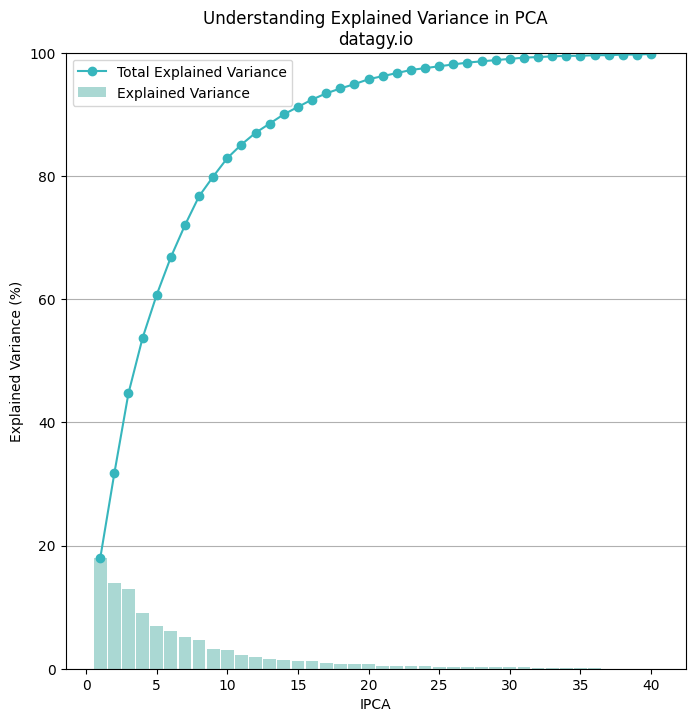

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=df_expl_var.index, height=df_expl_var['Explained Variance (%)'], label='Explained Variance', width=0.9, color='#AAD8D3')
ax.plot(df_expl_var['Total Explained Variance (%)'], label='Total Explained Variance', marker='o', c='#37B6BD')

plt.ylim(0, 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('IPCA')
plt.grid(True, axis='y')
plt.title('Understanding Explained Variance in PCA\ndatagy.io')
plt.legend()

In [ ]:
import gc

del new_data
gc.collect()

173806

In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Label'] = attacks.values

In [ ]:
new_data

PC1       PC2       PC3       PC4       PC5        PC6  \
0        3.383221  4.097159  4.167827  2.262118 -0.163982  -3.123660   
1       13.336168  6.891355 -9.328007 -5.904148 -0.334473  11.165764   
2       -0.409432  0.334065  0.023425 -0.531733  0.243809  -0.529609   
3        9.132636  7.936479  1.081842 -0.180257 -0.294932   0.290894   
4        5.242704  6.686928  0.998496 -1.511204  1.149176  -3.774327   
...           ...       ...       ...       ...       ...        ...   
106967  -1.472143 -0.562411 -0.164620 -0.620826  0.177469   0.458898   
106968  -1.474029 -0.563397 -0.162662 -0.619618  0.176816   0.463100   
106969  -1.602648 -0.630637 -0.029119 -0.537201  0.132260   0.749529   
106970  -0.856570 -0.011021  1.235768  0.639377 -0.059141   0.249530   
106971  -0.943259 -0.056341  1.325776  0.694926 -0.089171   0.442584   

             PC7       PC8       PC9      PC10  ...      PC32      PC33  \
0       5.217751  1.654145  3.506540  0.366325  ... -0.119094  0.015822   
1       0.474741 -1.325020  5.138204  1.025784  ...  0.500380  0.087808   
2      -0.586770 -0.315781 -0.067926  0.057978  ... -0.489742  2.063811   
3       1.491188 -0.054855 -5.416454 -1.009868  ...  0.039969 -0.056619   
4      -0.812173  0.289016 -2.191645 -1.144239  ... -0.104327  1.262127   
...          ...       ...       ...       ...  ...       ...       ...   
106967 -1.120074 -0.410467 -0.618597 -0.087489  ... -0.035305 -0.034967   
106968 -1.119172 -0.407236 -0.616010 -0.087306  ... -0.034233 -0.034216   
106969 -1.057665 -0.186951 -0.439599 -0.074794  ...  0.038878  0.016945   
106970  0.599943 -0.128145  0.197520 -0.001823  ... -0.033405 -0.022606   
106971  0.641399  0.020326  0.316421  0.006610  ...  0.015872  0.011876   

            PC34      PC35      PC36      PC37      PC38      PC39      PC40  \
0       0.123707 -0.037764  0.016459 -0.016151 -0.013148 -0.021086  0.008985   
1      -0.843166  0.250453  0.134432 -0.045300  0.090064 -0.207714 -0.290931   
2       1.410782 -0.139170 -0.198535  0.196212  0.099175 -0.071500 -0.060872   
3       0.053502 -0.045954 -0.198489  0.089941  0.066273  0.009662 -0.196833   
4       0.519054  0.019957  0.062166 -0.021662 -0.012026 -0.008957  0.138717   
...          ...       ...       ...       ...       ...       ...       ...   
106967  0.002464  0.001586 -0.025282  0.001219 -0.004455  0.000681 -0.001922   
106968  0.001542  0.001621 -0.024916  0.001056 -0.004530  0.000591 -0.002064   
106969 -0.061348  0.004006  0.000053 -0.010115 -0.009644 -0.005562 -0.011736   
106970  0.043216 -0.003866 -0.007748  0.003944  0.004706  0.003900  0.006889   
106971  0.000829 -0.002259  0.009081 -0.003585  0.001260 -0.000247  0.000370   

         Label  
0       Benign  
1       Benign  
2       Benign  
3       Benign  
4       Benign  
...        ...  
106967  Benign  
106968  Benign  
106969  Benign  
106970  Benign  
106971  Benign  

[106972 rows x 41 columns]

In [ ]:
# Machine Learning  Models
from sklearn.model_selection import cross_val_score

In [ ]:
# Balanced dataset for Binary Classification
normal = new_data.loc[new_data['Label'] == 'Benign']
intrusions = new_data.loc[new_data['Label'] != 'Benign']

normal = normal.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal])
ids_data['Label'] = np.where((ids_data['Label'] == 'Benign'), 0, 1)
bin_class_data = ids_data.sample(n = 20000)

print(bin_class_data['Label'].value_counts())

Label
0    10010
1     9990
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_bin_class = bin_class_data.drop('Label', axis = 1)
y_bin_class = bin_class_data['Label']

X_train_bin_class, X_test_bin_class, y_train_bin_class, y_test_bin_class = train_test_split(X_bin_class, y_bin_class, test_size = 0.25, random_state = 0)


In [ ]:
# Logistic Regression (Binary Classification)
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bin_class, y_train_bin_class)

cv_lr1 = cross_val_score(lr1, X_train_bin_class, y_train_bin_class, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 1.0, 0.9996666666666667, 1.0, 1.0, 0.9996666666666667

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)


Logistic Regression Model 1 coefficients:
[ 0.04733721 -0.74035033  1.22604652 -0.2866356  -0.18730033 -0.95586003
 -0.43114607  0.65546331  0.36372971 -0.08722295  0.30998786 -0.30139318
  0.00155646  0.24675853 -0.03406702  0.04396537 -0.16536327  0.57901809
  0.61514073  1.51393296 -0.75713518 -0.31129882  0.43015273  0.57510022
  0.16903071 -0.24312348 -0.02975006  0.1927489   0.12366968 -0.01102658
  0.65073022 -0.29529469  0.10749217  0.09252026  0.07916915 -0.06496943
  0.04488112  0.04020048  0.00211248  0.04421428]

Logistic Regression Model 1 intercept: -3.1508145470044115


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
y_pred = lr1.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2506    0]
 [   0 2494]]


In [ ]:
# Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2506
           1       1.00      1.00      1.00      2494

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bin_class, y_train_bin_class)

cv_lr2 = cross_val_score(lr2, X_train_bin_class, y_train_bin_class, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 1.0, 0.999, 0.9996666666666667, 0.9996666666666667, 0.9996666666666667

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)


Logistic Regression Model 2 coefficients:
[ 0.00364668 -1.7076041  -3.28937314 -1.91928795 -0.00600666 -1.0537512
 -1.19878381  1.41917245 -2.20732081 -0.00414061  2.69692348 -0.41886741
  0.78288434  0.13639461 -0.33786933  0.29680445 -1.28110679 -1.28640452
 -0.31208141 -0.29399482 -1.26343358  0.23716859  1.08932    -0.42073381
 -0.76682172 -1.09591202  0.05119838  0.42788148 -1.54974924 -0.40198505
  1.28643121 -1.38720901 -1.03198104 -0.96694519  1.29088862 -1.24458178
 -0.71098162  0.1853438   0.46215806  1.08397707]

Logistic Regression Model 2 intercept: -13.387177126461767


In [ ]:
y_pred = lr2.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2505    1]
 [   0 2494]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2506
           1       1.00      1.00      1.00      2494

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
# Deep Learning model
# Build the binary classification model
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout

model = Sequential([
    Input(shape=(X_train_bin_class.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_bin_class, y_train_bin_class, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9008 - loss: 0.2758 - val_accuracy: 0.9980 - val_loss: 0.0085
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9968 - loss: 0.0146 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9997 - val_loss: 0.0037
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.9997 - val_loss: 0.0040
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 0.9997 - val_loss: 0.0043
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 0.0044
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9997 - val_loss: 0.0051
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 7.9897e-04 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test_bin_class, y_test_bin_class)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9490e-07
Test Loss: 7.931508321235015e-07, Test Accuracy: 1.0


In [ ]:
y_pred = (model.predict(X_test_bin_class) > 0.5).astype(int)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2506    0]
 [   0 2494]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2506
           1       1.00      1.00      1.00      2494

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
# Support Vector Machine (Binary Classification)
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bin_class, y_train_bin_class)

cv_svm1 = cross_val_score(svm1, X_train_bin_class, y_train_bin_class, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 1.0, 0.9996666666666667, 0.9996666666666667, 1.0, 1.0

Mean cross-validation score: 1.00


In [ ]:
y_pred_svm = svm1.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2506    0]
 [   0 2494]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2506
           1       1.00      1.00      1.00      2494

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bin_class, y_train_bin_class)

cv_svm2 = cross_val_score(svm2, X_train_bin_class, y_train_bin_class, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 1.0, 0.9996666666666667, 0.9996666666666667, 1.0, 1.0

Mean cross-validation score: 1.00


In [ ]:
y_pred_svm1 = svm2.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred_svm1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2506    0]
 [   0 2494]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred_svm1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2506
           1       1.00      1.00      1.00      2494

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -1.1681690957330346
SVM Model 2 intercept: -0.7167068278437937


In [ ]:
# Balanced Dataset for Multi-class Classification
new_data['Label'].value_counts()

Label
Benign        96763
XMasAttack     3008
UDPAttack      2701
TCPAttack      2700
HTTPAttack     1800
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Label'].value_counts()
selected_classes = class_counts[class_counts > 1799]
class_names = selected_classes.index
selected = new_data[new_data['Label'].isin(class_names)]

dfs = []
for name in class_names:
  multi_class = selected[selected['Label'] == name]
  if len(multi_class) > 3000:
    multi_class = multi_class.sample(n = 3000, random_state = 0)

  dfs.append(multi_class)

multi_class = pd.concat(dfs, ignore_index = True)
multi_class['Label'].value_counts()

Label
Benign        3000
XMasAttack    3000
UDPAttack     2701
TCPAttack     2700
HTTPAttack    1800
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = multi_class.drop('Label', axis=1)
y = multi_class['Label']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

multi_class_data = pd.DataFrame(X_upsampled)
multi_class_data['Label'] = y_upsampled
multi_class_data = multi_class_data.sample(frac=1)

multi_class_data['Label'].value_counts()

Label
TCPAttack     3000
XMasAttack    3000
HTTPAttack    3000
UDPAttack     3000
Benign        3000
Name: count, dtype: int64

In [ ]:
features = multi_class_data.drop('Label', axis = 1)
labels = multi_class_data['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = len(y_train.unique())

In [ ]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,829 (54.02 KB)

 Trainable params: 13,829 (54.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the string labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the integer labels
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test, y_test_cat))

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6336 - loss: 1.0103 - val_accuracy: 0.8027 - val_loss: 0.2859
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7943 - loss: 0.3151 - val_accuracy: 0.7928 - val_loss: 0.2852
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8082 - loss: 0.2944 - val_accuracy: 0.7928 - val_loss: 0.2839
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8046 - loss: 0.2866 - val_accuracy: 0.8029 - val_loss: 0.2827
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7972 - loss: 0.2921 - val_accuracy: 0.8029 - val_loss: 0.2800
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7981 - loss: 0.2839 - val_accuracy: 0.7960 - val_loss: 0.2798
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8063 - loss: 0.2835 - val_accuracy: 0.8069 - val_loss: 0.2790
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8082 - loss: 0.2824 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.2877
Test Loss: 0.28079280257225037, Test Accuracy: 0.7943999767303467


In [ ]:
y_pred_prob = model.predict(X_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[776   0   0   1   0]
 [  0   5 769   0   0]
 [  0   1 736   0   0]
 [  0   0   0 714   0]
 [  0   0   0   0 748]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       777
           1       0.83      0.01      0.01       774
           2       0.49      1.00      0.66       737
           3       1.00      1.00      1.00       714
           4       1.00      1.00      1.00       748

    accuracy                           0.79      3750
   macro avg       0.86      0.80      0.73      3750
weighted avg       0.86      0.79      0.73      3750



In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9253333333333333, 0.9186666666666666, 0.9257777777777778, 0.9022222222222223, 0.9164444444444444

Mean cross-validation score: 0.92


In [ ]:
y_pred_rfc = rf1.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[768   5   4   0   0]
 [  0 554 220   0   0]
 [  0  79 658   0   0]
 [  0   0   0 714   0]
 [  0   0   0   0 748]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       777
  HTTPAttack       0.87      0.72      0.78       774
   TCPAttack       0.75      0.89      0.81       737
   UDPAttack       1.00      1.00      1.00       714
  XMasAttack       1.00      1.00      1.00       748

    accuracy                           0.92      3750
   macro avg       0.92      0.92      0.92      3750
weighted avg       0.92      0.92      0.92      3750



In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9604444444444444, 0.9333333333333333, 0.9413333333333334, 0.928, 0.9426666666666667

Mean cross-validation score: 0.94


In [ ]:
y_pred_rfc1 = rf2.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[774   2   1   0   0]
 [  0 636 138   0   0]
 [  0  57 680   0   0]
 [  0   0   0 714   0]
 [  0   0   0   0 748]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc1))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       777
  HTTPAttack       0.92      0.82      0.87       774
   TCPAttack       0.83      0.92      0.87       737
   UDPAttack       1.00      1.00      1.00       714
  XMasAttack       1.00      1.00      1.00       748

    accuracy                           0.95      3750
   macro avg       0.95      0.95      0.95      3750
weighted avg       0.95      0.95      0.95      3750



In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.9084444444444445, 0.9, 0.8951111111111111, 0.8831111111111111, 0.8906666666666667

Mean cross-validation score: 0.90


In [ ]:
y_pred_dt1 = dt1.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[768   2   7   0   0]
 [  0 494 280   0   0]
 [  0  54 683   0   0]
 [  0   0   0 714   0]
 [  0   0   0   0 748]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt1))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       777
  HTTPAttack       0.90      0.64      0.75       774
   TCPAttack       0.70      0.93      0.80       737
   UDPAttack       1.00      1.00      1.00       714
  XMasAttack       1.00      1.00      1.00       748

    accuracy                           0.91      3750
   macro avg       0.92      0.91      0.91      3750
weighted avg       0.92      0.91      0.91      3750



In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.9364444444444444, 0.9271111111111111, 0.9288888888888889, 0.9013333333333333, 0.9284444444444444

Mean cross-validation score: 0.92


In [ ]:
y_pred_dt2 = dt2.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt2)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[768   3   6   0   0]
 [  0 709  65   0   0]
 [  0 134 603   0   0]
 [  0   0   0 714   0]
 [  0   0   0   0 748]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt2))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       777
  HTTPAttack       0.84      0.92      0.88       774
   TCPAttack       0.89      0.82      0.85       737
   UDPAttack       1.00      1.00      1.00       714
  XMasAttack       1.00      1.00      1.00       748

    accuracy                           0.94      3750
   macro avg       0.95      0.94      0.94      3750
weighted avg       0.95      0.94      0.94      3750



In [ ]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9057777777777778, 0.908, 0.8928888888888888, 0.8871111111111111, 0.8951111111111111

Mean cross-validation score: 0.90


In [ ]:
y_pred_knn1 = knn1.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[773   0   4   0   0]
 [  0 623 151   0   0]
 [  0 220 517   0   0]
 [  0   0   0 714   0]
 [  0   0   0   0 748]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn1))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00       777
  HTTPAttack       0.74      0.80      0.77       774
   TCPAttack       0.77      0.70      0.73       737
   UDPAttack       1.00      1.00      1.00       714
  XMasAttack       1.00      1.00      1.00       748

    accuracy                           0.90      3750
   macro avg       0.90      0.90      0.90      3750
weighted avg       0.90      0.90      0.90      3750



In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9164444444444444, 0.9146666666666666, 0.912, 0.8973333333333333, 0.912

Mean cross-validation score: 0.91


In [ ]:
y_pred_knn2 = knn2.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn2)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[776   0   1   0   0]
 [  0 664 110   0   0]
 [  0 208 529   0   0]
 [  0   0   0 714   0]
 [  0   0   0   0 748]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn2))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       777
  HTTPAttack       0.76      0.86      0.81       774
   TCPAttack       0.83      0.72      0.77       737
   UDPAttack       1.00      1.00      1.00       714
  XMasAttack       1.00      1.00      1.00       748

    accuracy                           0.91      3750
   macro avg       0.92      0.91      0.91      3750
weighted avg       0.92      0.91      0.91      3750

